# Algae Cover by Region
Algae cover as fraction of benthos in each GCRMN region. Based on visualization from GCRMN 2021 report.  
[Sister set of visualizations for live hard coral cover](live-hard-coral-cover.ipynb).

_Author: Peter Kerins_  
_Created: 16 Apr 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Time series
- Line for value
- Multiple, overlapping area marks for confidence intervals
- Different mark groups for modeled vs observational epochs

## Data
Time series data from GCRMN 2021 report.  
Carto: [ocn_dash_02_gcrmn_lhcc_ac](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_dash_02_gcrmn_lhcc_ac)  
Table includes synthetic data points to assist in drawing lines & areas without gaps.  

# Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Specifications
The 'structure' of the time series data was not the same for all regions. A separate visualization was created for each region, but these generally fell into groupings within which the specifications were very similar.  

## Type: AB
Regions where the times series data follow a simple AB format (modeled, then observed). The only important difference between specifications was `region_name`.  

### [Australia](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxBlYsDw6gCjEw4IRG0xC0g2NurHURkBuSlqH5+3J8E02j5+gAyilkQBadjoWDIZRgLX07Y1O1gACqbIAMmAnNxrIRWEYjIUwMp0Hh0GBrbb7bIWeyuTyAdSJvtWIQwz5bnd8EQSOQbJoLeobHR4Oh1BUy9xUKR0IRGJR0nwAI5GAD8LYAvCaAKKe3vPAAqYAAVGAAGJsgDyHLA3HgMkBYdgiEBMXSgOoBtQS6MiHg8EB6HgYAA6gAJXts3tgCoN+BdgCk6QA7I90MgX6+wAYaQARMBt3UXdATxMAuy+H47m-O4-mTJdsWg2DIDlJQAF0JjJcNMBwdEFShKAVX0E9dSVNUjHqSAkRufQKM1CsiTGVMlV9EDw12c5JhaHEpBTQjEkIdRuFaSsmluYSbCCFj9i1W0qKaZAK1uTNkCwGCAE07jGQj5QFSV0BkWA2J1PD0LQiBMMRcsZgGMB8IWRVEmIqBDgQAI6hk7jWluHRiS8skaz6PQ5mwiNblI+QoBcZAjGUW5FOUvT9ilGRqBxMIIgCoYCjS4o5RYpyiPpBL3JmLpCMCjAvDReIwBiOgADZMLASqZEYDxIklEUosq1L0tuZJUk6CywCs0pDjUNEMUqv1GC2W52G4AgazIxIypxNybM8yqjHQdhYonYVVy69Qet2-bYunKw9sIU6RQKmbSTmhb9BmJxOgCjbSu2tbJmYcr9AABV8DxenS+cmQO7xEA6xwrD+yATI4-Qn1Q2EMKwjB1AAazshyICKxoeNuahhPTRGnGE0y5gE6KT2QE5aa4pUXOo3x5tgY94AqlnEkzXCoEi1q+agMnuHTdhxP0YDQLxdGuLhWEAoF6aWaKrESpIo9UBWP6Lgl9ROv0W1NDUbn9aVAyjJMtXReZ+3EmaHz2kYIxtl5x3NkOITfO4AAhbhuBmQyAAoAEJM1YVA6FBG01TtABKBXRaVrjzJZtPLIC7G8bt84NatkmSP+TAvP2KnVtOMLBcgE9AV1+Lkq4yAlgsVZTjptMM3DWZC9JQ4qO+-Qto8rokfmuKEqUnZm9FyBpdC4eoCab6oon2L4re7gbF8QEAE5RGYruBSadIh9+-RV9+9eYqnujCFEg+j7nvmJ6DKihRFW4AGJRH-gBx8vbRTdkYacuR4DMEXg0L+swGoAEYADMr8WaNCDu7LQnFgHUXNLRKAwApgzHUh+MwrwrB3CincNkCE7hYCjjHWWS48SUI0jPWhflkATj9BgPAod6F0ESuoeQmk7iJ0oWQ3wtDka8P4bA4RdB0hPlEZQgAHDEJ8LxnCuDbsgKR3Dwx8PDNHOgRgd57zUaOeBcR5HwKcKI6CgBkAjgtIwxeBjHpifhYqx8Q7h0FsfYmCFCviHw0a8GQLg3AeD0exGRRiY6mN3uoZ+ljrG+P8YnRxzj9GxLcTHDxe9D4pJ8X4uxGTAmUI5IzRAKxaGuOMXHWACd7Tti+JUwykN5zsFNv4KkRlvg4DuByFYsU7SiNGCne2WdFblwFNUhGndsEuA-tXWBv92DsEao1RBiCgFe3fmAiBUDP4BG-jgBqogpnnEuQsa5KCHaoOdjiCsSlLaJErjTBoqttYNz1ncxYywO73LfumVSWD7aQEHtXZeEK14gM3tPJKMzSTQOopfFesKN73ygAk8xMRdmOwXufKFaKF4YrvlvKA+SklqPxeCpZlEVknJxH-AB-9aXz3peAk8RzGXCjgXQZBSL9LoJ0HdBZwCoA0QZfgwhakHgmE-Jo8hlDqH4hkLQ-hjCwI0BYWwrAHCuExLqTHQRwinxaTEV8CR6hok8ONXQORvjFHKK+Go0JWjIm6KwC4-hOLqUxCKTY0pmSfg+riXQKlgIvGpJKQEpRlCQmaPCdo9wXqw25JMWYpJhTvFBoCU40N2T7WRpzTG9JyEgmDKqTUrA9qGlNLAC0qt7TGSdO6eGXQsB+mtOGTMZQYyJmpxPtCIViQ5m+DBRy0Bxy+VrI2VsnZfyBScsOc0Gdpz6p0FfNcjGQ7M4zP7t5HEwYZA7Q5dTKiXyhY61+UK1uAK+7DspT3LM4qCWQqXiS0e5Vb6TwpQvGe7K34ouhdfMev74X6FWUui4kpuA4z7oKJlv9WVspg1bEVmC317KlbcAhAM5UkKVZIlVNC6Hhq1cwr4rCKzsMYKCQ1dr+GmpEZau41rbUGNkUy+Rzq2NuqTREnRnGcnGL9VGgNua0nBruAW9N7jH64sDdJuNlbE1hKE6mkT9rxOluKeW2TWSjX8JLaIZTsaynxtadW-ttb+H1v+M06zLamTcC6b4Hpnbu2DN7aMxO4yn3QifehpIbwdhQrgwh9dzL1mbO2WMHd8I6ZTIzjcwqlVHmk3JndAK7zJ2sQZkzQ9yotaSo5ubYWJ8a4RR5r1ee4tJaL0gJRmgg6bm6RVjhfOexits3rm56SVXpBqmNmVs2XNIpVetsZbh3X1aBaPbcJZHs6t7KOL7fQFRA7ByUjIOtSlGmOeTsFk+qWrmEXGgKXO+M6bFcyyXF5d68vVyvXXI8A2gP7DbsM-LpIQW91+y3D9DRoXfs8nCrFAHEULYXhfMeV8yV-tuLpl+o6lRnzh4DdFN8If-tM59lu9Lou-3SI1dAMREHwIJ6SFd3K128o3Q1dI6GnaYbFUCgluH9D4emIRhVpCwuVtVboDVFGdxMJ1dRvVBqi3MZnmai14jBfetl+Gx1CilH8fUYJlNUSVfGfDeJ6N+mZNydVxmyNxu82WbU6Id1ybPXad9Vm5JUmLMhvk3kxT2azNu4M1ZqtLAa37fjo5xtzmZAdIGx5jtsgu1gAGUM1QfaB0LcSyOp9oX5kc7fkThnMX53xZZyAoMXLIH09Cqss5dALknb3dM27U3i5C1Lq86KF6Xtde+R9pd9726PoJf919OfUHA9RfD1yiPIMr0A8X2HxKJ+kpx5i-9Ru8Vz4xwvrHS-wO49VN7iT1Pl3TvzyTsnFOqdz9p+XlFVfN2CphxUYOorAeoK5zKgjxD+fEZtaRtVouM0WtqBdVaN9V6NOFzdjEWNzUXV2NldPcHUeMnVNdVFtcNNdc01ID4kXcrcVMykzcDcLcD9cD3dylgk7cddHd9cmNDcXc9NrcPcsCI0D96C8CK0KkbNal7MDsG0m02lI9W1o8-BY8+kE8e1k8-MAtgF094Q0cs8J1sMp1llK9kN9Af5YsF0j8K5QEy8eUVDZ1q9t068+ZbkD0m8XZsUvAz1c8O9QpXt+sukj8+8ftFCW4h8B89kx9Qcp9IdBEtD0dMccQwMf098oNkM58JRhIotT81DSdydKd-DWdn8sMR83539IAeciF5UngOM-8RdyNADxdtVgCpdQCZdCCoD5dWMldyFqCuM1ckCNdYCBN0CqCEC19zMDMCCaCiDPFJMy0ZMA91MPVhM6jRNsDElXcBj80jMeiFMn5WDSCA9Kkg9bMQ9DtXQ+Ddso93NhDel49E9fN+1-M2tM5gs5Dx1wsl5ItEM79IB1DC9F1EtbkLtRpzJRggA)

### [Brazil](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxACF1OhqowjJBwQiNpiFpBsbdWOojIDchLUPz9uT4JptHz9ABlFLIgC07HQsGQyjAWvp2xqdrAAFU2QAZMBObjWQisIxGQpgZToPDoMDW2322Qs9lcnkA6kTfasQhhny3O74Igkcg2TQW9Q2OjwdDqCpl7ioUjoQiMSjpPgARyMAH4WwBeE0AUU9veeABUwAAqMAAMTZAHkOWBuPAZICw7BEICYulAdQDagl0ZEPB4ID0PAwAB1AASvbZvbAFQb8C7AFJ0gB2R7oZAv19gAw0gAiYDbuou6AniYBdl8Px3N+dx-MmS7YtBsGyrCSgALoTGS4aYDg6IKlCUAqvoJ66kqaoyqckBIjc+gUZqFZEmMqZKr6IHhrs5yTC0OJSCmhGJIQ6jcK0lZNLcwk2EELH7Fqtr1JATTIBWtyZsgWAwQAmncYyEfKAp4BKMiwGxOp4ehcoYVhCABGoaIYoRyr0rchw2TMZGJM0rS3DoxIySoNZ9HoczYRGtykfIUAuMgRjKLcSkqfp+xGdQOJhBE-mQEMBQyEUOAxHKLGKokxFQE0bl1JFjnKIFXhovEYAxHQABsmFgI5MiMB4kSGSKVWkilOLJKknSWRAmEhOghx2XhDmkn6jBbLc7DcAQNYeVAFUuVtmVGOg7AxROwqrj16h9Y5e0HUY05WHthCnSKhVzQKC1LfoMxOJ0mVbfo5Xlu5mVTO5+gAAq+B4vSpfOTIHd4iBdY4VgbZApkcfoT6oQscITYkGDqAA1gMYD4QsxXcd5+jUMJ6bI04wlmXMAlRSeyAnIzXFKqV1G+ItsDHvAXRM4kma4VAEXtRziRU9w6bsOJlM7kueKY+ccKwplIv2RzZNYs5JFHqgKwbRcMvqN1+i2poaj88bSqGegxmmVrksQDrXGNDxtwuEY2yCy7+xHEJPncKK3DcDMDsABQAISZqwqB0KCNpqnaACUKuS2rXEWRzWfjZleOE875xu55nskf8mD+fsdPrVRmv64ChtxUl7tLBYqynEL5EZuGsylwKhwKT9UCuf9lVRYtsXxcpOyty7inD+P8U7ZPMVxe93A2L4gIAJyiMx3f7E06RL7ZK-L5FKNTxvUDpqJe8H-PkvX0GClCiKtwAMSiL-f+H-7Vi0prq5HgMweWIUP6zCagARgAMzPw5o0MOPstCcUAYkGilEoDACBupB4JhPwvDeOoO4kU7hsgQncLAccE7AVAnichmlZ7UN8sgCcfoMB4EjrQugCV1DyC0ncVO5DXhWGoajbhvCoGCLoOkJ8wjyEAA4YhPmITIFwbgPASM4eGHh4Z450CMFvHeKjRwwLiLImBThhHQUAMgEcFJH6LwIY++piYjmMsXcOg1jbEwTIV8feajXgaNcO3ZAOj2JSIMQnYx291CP08fEbxvjU72Mcbo6JLiE5uISfvJJVibFpP8eQjkrNEArGoc4wxSdYAp3tO2L4ZSHbQ3nOwS2-gqTGW+DgO4HIVgxTtMI0YGcXZ5y4oggUFSkZdwwZPN+VEoHf3YOwZqzU4FwIARg1+ICTzgPfgET++U6CiHGarbuZz4TV3Zi-LyOIKzKVtokWuDMGgNzFgbI2kzFjLE7jche6Y1LoP9pAIeVER6gtXtfdeM9ErXNJBAhoEK-rnyvtFaem94mAhUVswBilT7guXr9KF6Lb6QFydimIuKQXe2wQ0JZ+gf5-1-tShetLpygP2Ysw50C6AIPhQZFBOh7qzLmZtc0tEcF4I0h+MwYjfABIoVQmhMSGCKzAjQJhLCsBsI4VE6pCd+GCKfNpERXx5WkKwE46RPLZHyMUV8FRwTnBhPcBEq1mSDVGJMQksxFjkk+KKekn41rVUUr9V4wNfiFHkKCeozR4TIlcK9XEne+T-WFL8Q4kNnreEUvTZG1JyFFVlJYJUrAXran1LAI0vpykZCtO4O03wnTdCwB6U0gZMxlDDNGZnI+VyB1JBIcCtlwCDnChxF-FZayNmspfuyzlzQJ1HManQV8ly0JjKZpMgeHsKZQGDDISq3cUb0wUu8yAJ4m5fIFZAduAzR3u0BX3J9SCwUhQhWPVFa8MVlVnvOpBiLqJErKiSm+twlnfIFLAQy3B8b90FDy7+zKWXQf2BUcOwq30vywbcXBzAZgysIXKkhirKH4hkNQ3h9Claaq+MwisrDGCgj1cm3hRqhFmruBapNeibWTrtQo7jTr42uu0R6-VvDU2+o8RmlJQa7jZtDdkug4a5OFsUzGwJohnWhK0e6lThiZOJPk1G4pync1hsIA-AtAai0lKaeU8tlblJ1P+A0pzLTGRtI6eGNtHa+ldqGanEZA7oQDvQ7gEd4K4MIZXVOmd6zNmjE3fCHdhEc5YyKo5O5txpY00yi8nDKMWZsz3VzS2vMbb9Rfpe8Wp6CuEDlvl9VysMuqw1jhYuewKt6w+YCJt0lT3SDVObTaPNrYRVPfbR2nCeva3C+THE3tfa1bxYHHY+gKih3DvW1zycPPp0i93LL5zzg4wFIXImJMS4zfLmLSuTyornvrt1xuQ3ANKgfX8geiQX1ZlFXij9SLQOQsvr+sl-CvsIrPsDMDEPoV-sgCZ-eMOBQnzhziFFANIeqhs2mp+Aqa7ju5ZO7+6RmroBiHAmB6OSdBg5Xs5dZPV1NXSFFzyQq0FA+2Xh-QBHpj4NlcQ8R5CKO6Go6q2jGrqBaqYzqlj7CrOqc4yah1PGyOSfY6qmR3j7UidUWJgzfGsnGZ9ZSgpCms0ZKk9Zh+Eb7NacVXGkJCa3Wm5TRbuzmaLO2516p-NogrfmeLaU5zPaK28KrR5mtXmG0+aGy2-zsh21gF6f01Q3be1LbS9CYn0WZn-JpaTyByHGVJbnZz+ZuywEs7L+T45pyTvbtztcvdeWK6PLvcVt7YUPvtPR-e35-ch0A9H3M0FWPtqI9JbCueBfEjAeReBmFmL3H06VJjwl59iWz4g3RAnsnN-PNL-S8vUAv6U+p7Tk-Nemd1+Awytd-KlvIKwzz4veL+dSsI8LkjouCq4uyqNGbW9GdwjGlquqKuhiaupqoiWuRmCceuciwmyiRubu4mhmMBsSFujuvuwaSBamR+luZmDm2mdwruLqJu2u-GqqqOweZBimlmdugeJBPu1uxSFBpaFSkeB27mrotazSCeTISefgKe3S6enaWeIWYWcyeeg6eK0yvgOGpItKCWyyqyyWd+OyD+XKDebO66ChaWlyu692B6KOXgJ6bKr2IU9WR4n20Gw+HcE+IK4+qhg80++g36uOSOUOAG1ei8O+8Oikq+yOUGi+m0cWiGz+kAV+VONOdOgRmGqCIqX+IKP+kAguRGBCTwvGwBlGUuqmMujCDG2q0BrBsBs8xq8B5qiBOBdAKBBu6Bem7uEmRBJm+BnBhBDR6mIe5BLuumxuiatBZuuBWKHBoeSm-udBbBtmjBmm0aJaEeVS0ebm1aQh9ajaza4hXSaeGewWPaoWfauckWBew6ReSK0RGhFeWhVeJhHWewZ26W40IAowQAA)

### [South Asia](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAGVuOUHAYqphwQiNpiFpBsbdWOojIDcuoifz9uT4JptHz9KKUsiALTsdCwZDKMBa+nbGq2sAAVTZABkwE5uNZCKwjEZCmBlOg8OgwFabXbZCz2VyeQDqRN9qxCKGfLc7vgiCRyDZNOb1DY6PB0OoKqXuKhSOhCIxKOk+ABHIwAfmbAF5RQBRD0954AFTAACowAAxNkAeQ5YG48BkgNDsEQgJi6UB1ANqEXRkQ8HggPQ8DAAHUABI9tk9sAVevwTsAUnSAHZHuhkM+X2ADDSACJgFu6g7oCeJgJ2Xw-HcX53H8SaLtiUEwZAcpKAAuhMZJhpgODogqUJQCq+jHrqSpqkY9SQEiNz6ORmrljq8oCj6wFhrs5yTC0OJSMmBGJIQ6jcK0FZNLcgk2EEKYClqNqUU0yDlrcGbIFg0EAJp3GMBFMfseDajIsAsagaJoahEAYYiZYzAMYB4QsiqJERUCHAgAR1FJiTNK0tw6MSHkqNWfR6HMWHhrcJHyFALjIEYyi3PJik6Uq+nUDiYQRP5kBDAUMhFDgMRylJDmEfS8WuTMXQEWSgVeGi8RgDEdAAGwYWAVUyIwHiRHpIqRVVKU4skqSdGZYAWaUhxqGiGJVb6jBbLc7DcAQ1akYk5U4i5VnuVVRjoOwMXjsKK7deovW7ftMVTlYe2EKdIqFTNpJzQt+gzE4nSZRtZXbWtkzMBV+gAAq+B4vSpXOTIHd4iCdY4Vh-ZARlsfoj4obC6GYRg6gANY2XZEDFY0XG3NQglpojTiCcZpx8VFx7ICccx045pX6DamhqEe8CVRxSoZjhUARW1fOJGTEqEOwon6EBIF4ujHFwrCmUC9NfPFVibNC4eqArH9FwSuoXXs7482wNz+tKnp6AGUZaui4TLMCl5OIuEY2y8w7SpHAJPncAAQtw3AzDbAAUACEGasKgdCgtaaq2gAlArDtKxxpl82n5mZdjeP2+cGtWyTxH-Jg-n7FTq2nKFguQMegK63FSWkksFirLTXtQGmynsZ3kCHJR336FtbldEj82xfFCk7M3ouQNLIVD1ATTfZF48xXFb3cDYviAgAnKIYzlxx8-pIPv36Cvv1r9Fk+0YQwn74fs98+PgaUUKIq3AAxKIf--0fJ2FdGCBinLkeAzAF4NE-rMRqABGAAzC-E+FRg46Duh3TuSpqIUX0MAKYMxVLvjMK8KwdxIp3DZPBO4WAo4x1louPEFC1LTxob5ZA45fQYDwKHOhdAErqHkOpO4icKGkN8DQ5GPC+EwKEXQdIj4REUIABwxEfC8ZwrhW7IEkVwsMvCwzRzoEYbeu9VEjjgXEORcCnAiKgoAZAJYJSIMXgIxaZH7mMsfEO4dAbF2OguQr4B91GvBkC4NwHhdGsWkYYmOJid7qCfhYqxPi-GJwcU4vRMTXEx3cbvA+yTvG+NsekgJFCOSM0QCsGhLijFx1gAnO0bYvgVJtpDOc7AOb+CpAZb4OA7gchWDFW0IjRgpy9lnRWx99hVIRpgvubtcEhRgT-dg7AmpNQQQgwBWCoogKMGA48kCP4BC-vlOgohJnnCuQsG5yDC6eWLkLUultEiVxpiFVWxEdZ62QYsZY7dmZ927mGWYDyBQD2rkvfuq89kbynolaZAooFUQvsvWF6875QHiWYmIOysGn3PqPS+GLb6by7g-XF+KFn7JOcKHEv9-5-2pV7N+BzwHHOris85SCkW6SDu7LQvcCU4NuPggGKkHgmA-BoshFCqH4hkDQvhDDQI0GYawrA7DOHRNqTHARQjHwaVEV8cR6goncL1XQWRPiFFKK+KokJmiIk6KwM4vhOLEmeJScU-xjifjutiXQPJXqYiFOsSUpCgS7jBI0WErR7hXWBpycY0xiSCleIjX6zJuq+EhqSZm1JkayktMqdUrAVr6mNLAM0gZCkZDtO4J03w3TdCwD6S0oZMxlCjPGanIB8I+W4DeDseZrLFl0rOVAb+ayNlbJZQ7NlhyIHNEnbAugL4bkY37ZnY+4LibeTel4Hai73mUS+drBuvykWQFbkM4Vr8QWZjHYuyFi80UwuvnCrF89p4Lrnii6FV9R43wnuSwUpy6h-IFLAPS3AcZgog-Sn+TLmXQf5WgoVL7WWirwQQyVxDZUSPldQ2hQbVVMK+Cw8sbDGCgh1ZavhBrhEmruGai1+iZGQbkXa1jjq43hO0Rx7JRjPWAm9UUtJGSA1ZKtfmiTWbSmKIobG0JgnE3CatWJjNPqpN3H9cmtxlL02iHDUW-xynS0sHLZWhSDT-hNNLW0xkHSulhjbR2gZXaRmJzGQO6EA70PDrmYvODCG12rPWZs7Zowt3wjppMjOtyipVRdqTcmd1Mpnuw28hmTN91OSoqbLmwsnY13CjzPqi7xZpilqTbcjCaB9tudpFW2F857AK1rOuh4m2STK9INUxsoAczNhbG91tbZcI6+rfznFD17Pdr4T2fcfajsmAHAV9bbPxwc8nQLTskvXIIuNAUud8Z033WlkuClXlRWpue9r3zAR9f-fsO9gLwWJCfWCub-ciWA2cqSsDCKZ5DsSIBj9wGKqgfhVvBJT83snyaGfKFUPgdw4pY-A+SPSQTq5ZBn+6QmroBiAguBuPmL7OXZy5ZhPznpCC55AV6CH04bNDRKA4rpgEelSQkd0aFW6GVeRhrarqAapo1qujHDZNMenoa41YiBdurl0Gm18jFF8bUQJhNkTVe5qDWJhT5nSkGbVym+TYbC2+qU9G1TzqhMG8Y0btNBbdPFvN4by3xn3eSeLZZut1me0Vr4VWhzNanMNpc31lt7nZDtrAP0wZqhu29rm3F6EQ6kgjrZ6-fHdPkP6BnVF+dTPFvsqOaugnReGoXMz-FndUzLtleu8827N7sufKe5e170Hb0At+8C9MoK88nzfQ0aFI8YffvAwIyn+xIfEvRV+zF4Hjd4vL4StHy-54Y5-VbhfSoC-QPp9O4npPydH7edTjl1fC9Tsaryv7qDBUYKBbskbHOlmQG54QqVTw7GJGiqIuKaFG6qVGmq2qFuRizGRq9qbGKuhmMcGuvGKiOuameuSaMBcSbuJutu0myBwavu+BemgeDu8aLqmmHqbuOm-u2aMm3uRm2OpmNuZB0aFSweNSYedm1atarS0eTIsefg8evSSenaqePmfmuyDeQWOeIWX2x+tKNeU6kAJec6MW4OFeNO9+p+tejUm6B2Te1ye6reTykAQYMgJ6c8XeDQF6PWL2nSlOA+bcQ+rKP2Y+pIE+qKu+0+7ks+oO1+y8AOOI0O-ha+twKyW+sGgk4WKhDKF+ZOFOW+r+rOOWc8uGXO+GRCfORG5qwBwuZGYBYulGdw1G5q0u9GOB-CCuLGyuZCzunG6u3GtqWu6BTqlBTuRBG+ZmBB+mOaLuPuHi1uHuFm9uogHR6m+u3RtBrBoxZuAxTRQx+Scx9Bdu5SZaIeO29mLo-B9ajazaIhPSieye3mPavmzWmcgW2esyy2UKYWiG3K06s60WYwcWdyJ2o0pkowQAA)

### [Caribbean](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxz3QmnY7GQ6Dk4IRG0xC0g2NurHURkBuXURP5+3J8E02j5+gAyilkQBadjoWDIZRgLX07Y1O1gACqbIAMmAnNxrIRWEYjIUwMp0Hh0GBrbb7bIWeyuTyAdSJvtWIQwz5bnd8EQSOQbJoLeobHR4OKKmXuKhSOhCIxKOk+ABHIwAfmbAF4TQBRT0954AFTAACowAAxNkAeQ5YG48BkgLDsEQgJi6UB1ANqEXRkQ8HggPQ8DAAHUABI9tk9sAVevwTsAUnSAHZHuhkM+X2ADDSACJgFu6g7oCeJgJ2Xw-HcX53H8yaLtiUEwZAcpKAAuhMZLhpgODogqUJQCq+jHrqSpqkY9SQEiNz6ORmrijq8oCr6wHhrs5yTC0OJSCmBGJIQ6jcK06jNLcgk2EEqYClqtqUU00o7PombIFg0EAJp3GMBFMfseDajIsAsagaJoahEAYYi5YzAMYB4QsiqJERUCHAgAR1FJiTNK0tw6MSHkqNWfR6HMWERrcJHyFALjIEYyi3PJ4pjP5uIytQOJhBEyVDAUMhFDgMRylJDmEfS8WuTMXQEWSgVeGi8RgDEdAAGwYWAVUyIwHiRHpIqRVV+lpbcySpJ0ZlgBZpSHGoaIYlVfqMFstzsNwBDVqRiTlTiLlWe5VVGOgUpGOOwort16i9XtB0xVOVj7YQZ0ioVs2kvNi36DMTidMlm1lTt62TMwFX6AACr4Hi9Glc5MlK3iIJ1jhWP9kBGWx+iPihsLoZhGDqAA1jZdkQMVjRcbc1CCemSNOIJxmnHxUXHsgJxzPTjmlfotqaGoR7wJVHFKpmOFQBFbX84k5PcOm7BNGT26LniGMcXCsLJYLM388VWLs8Lh6oCs-0XJL6hdRzvgLbAPMG0qekyoZfq07ZrP2U7umk+0jBGNsfNi-sRwCT53AAELcNwMwygAFAAhJmrCoHQoI2mqdoAJSKz7yscaZ-MZ+ZyU4-j6scZr1tu8L-yYP5+zU2tpyhULkDHoCetxTpHGQEsFirHTPuJOmynsT3zmUT9+jbW5XTIwtsXxQpSUu0qMu1yPUBND9kWTzFcXvdwNi+ICACcohz4PiRNOkw9-foq9-ev0XT7RhDCQfR+tz7k9BpRQoircADEoj-wA4+J935GCnLkeAzBF4hS-rMRqABGAAzK-MWjQQ6ey0APYB1EKL6GAFMGYql3xmFeFYO4kU7hsngncLAMc45ARAnichakFLUN8sgcc9twzh1oXQBK6h5DqTuMnchJDfDUJRngbh4ZY50BgQIug6RHxCPIQADhiI+F4zhXAd2QOIzhkieFGB3nvNRI44FxHkXApwQioKAGQCWCEipF4BkemJ+pjzHxDuHQKxNjoJkK+IfDRrwZAuDcB4PRrEDHSLjkY3e6hn5mIsV4nxyc7EOP0U4lxj896H0SZ47x1jUl+PIRyJmiAVjUMyXHBOsAk72jbF8UpMooZznYJzfwVIDLfBwHcDkKwYp2iEaMNOPcc5K0rgKcpiNu7AJcB-WuMDf6Siak1BBCCgGDxAWA48kDP4BG-vlOgogxnnBOQsM5yCiZOxJt5Yi5craJGrg7BoatiK631pcpUHd+mYP5pAPu4ZZjF1JIcC+49R5ryilPLeK9Z6fNJFAhoy9IDX3HrfaFtxYkmJiBsnuKLz5L0vivSFG975QFcdi3Fb85k4OgfsnEf8AH-ypSgml2yIGiQWfS4odAkETNJBUUOOh7ozJPlAbBtw8GAxUg8EwH5NGkPIZQ-EMhqE8PofLGgTCWFYDYRwyJVTeEKQEY+DSwiviiPUBEjAUTnFxzkV4xRyivhqKCVosJuisCOMMcY+J7ikkFN8fYn43rol0ApX6mIeTLGFKQv4u4gTNEhO0e4T1oa7V0CxfE3JHiY1BvSQanhEaEm5uSbG4pjSykVKwIampdSwANN6dKGQLTuBtN8B03QsBumNP6TMZQQyRnp3nvCpUUzfC-NZR7WlDRFn6B-ss1Z6zR1V2ney3ZXLhSwLoC+M5mNh3ZwmcCzityoDBhkLtalNNKKvJ1k3D5-LNjLC7izTZAKsyirxaCwl4LnIkrvjClFcLH37ERVRIlKL-0Yv0IsldSpYB6W4LjIFgpuXzqZcyuDnk0HCsnW-CVuD8EyqIQqsRSqqE0LDRq0CWqvjMPFKwxgoJ9U2sNXwk1ZqRFvCtV6jJPCHUKKUeau4rqk2hJ0darhPq4mAn9fklJaSQ18bDcWuTeailKPIYm4J4nU2SdtTIrNJaA0KbuMG9NWSn45pM+WzTlaWDVtrdKWp-x6mVuaYyVp7Twxdp7b0vtgzk7DPntCEdIHcDceHoh5Deyt1LPYCstZYw93wnpmMrO5yipVS8jiCWlNkpPLwwzDwzNj3Km1lRM23MRbXNvQ3XmfU355cINLWWwFNVFDS9pVW2FC7nDK05ergI22SWudINUJtxVVYthFa5NsDJGT62LY9rtT3vy9o14BftFKTCDmg5tTnE6udTiOp2GXTkEQmgKfOBN6ZlZy+Fe5j7kbXtrnVxuI2WW+2fUC+e-yMyAqKyCsFQM-03yhZvGeiUsMrxBziVFFV0WQ+3jJw+X225nzh79NFEOyX-asy-cLjzp2xYOVAH+6QmroBiAguB6PSRsvARuulcXDnpBh6goVGDP2bII1AKV0xiNyuIdx+NyrdBqqo3LGj1BtUMd1Ux9hymM3scEcJy1+nDUCadcJ0TOmU3hN44WsNRm1NlvzUp43GbVNRtLYGjT8btPuok0b1j0mcmiGjebop5nleWY917+3caSlVoHTWnhdbXMNvcy2zzI2O0+dkN2sAPS+mqH7YOkLqXB5waSJFnnU75ks7J5ABdCWl30+YmupnnLi-buOadg94y7tzdLg3J71zCtvd6284bbTK-tx+0DsiAOP2vuAd+kKyKx6I9x4BvhlfQNY6vlB5HZ7fWyZxRzzHP7QeQfB6SwDNvF9KhpaThllPqe05P8ToM67a+zrQw1XlHPBXoJFePsVVFzQ0X50RwhwupGVq5GKqkuGa1GjCdGOqeqfuccqupqzqdwGuruUmYa2uQmqi6iYmBuaasBmaG+ZuQeZmBabuKm2SkagepmdmCaogbqyaHqmu7u2anudupmvuVu-uzBlBtm8apSDmYeh2LmrojaTSseTI8efgieXSKeva6egWwWYqKW0I4Wee0yn+eKZ+m6JeZeiWy6ROUKd+NeYGc6z+u6jeYsFyR6rea256l6rKr2IU72h4n2o6g+ncv2b6o+HhE+y+YOOOh+UOOw2+vh++-hAGtwsG+hVE0WKGJhpel+NOdOr+OG3O6hvOP+tKkAAuBCsqTwGuIBEulG4B0ukBdw9GPGMBHBcBxqauXGpCKBBm9q9K8iOumBdBumhuFmMSBBtuNmFuXR4a5Bm+3Bvi1BTu9BLuAxRm1m8m5a7BpB1uQxMx6mwe9m5SAhEezm9aIhzara7akhnSyeqeAWA6QWQ6FhYWf246O2SKMR5+8WuhyWTsFyl2Y0pkowQAA)

### [Pacific](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAAV0PBGC54JBwQiNpiFpBsbdWOojIDcuoifz9uT4JptHz9ABlFLIgC07HQsGQyjAWvp2xqdrAAFU2QAZMBObjWQisIxGQpgZToPDoMDW2322Qs9lcnkA6kTfasQhhny3O74Igkcg2TQW9Q2OjwdDqCpl7ioUjoQiMSjpPgARyMAH4WwBeE0AUU9veeABUwAAqMAAMTZAHkOWBuPAZICw7BEICYulAdQDagl0ZEPB4ICJWAAOoACV7bN7YAqDfgXYApOkAOyPdDIZ8vsAGGkAETAbd1F3QE8TALsvh+O4vzuP5kyXbEoJg2VYSUABdCYyXDTAcHRBUoSgFV9AlXUlTVIx6kgJEbn0cjNQrHV5QFX1gPDXZzkmFocSkFMCMSQh1G4VpKyaW5BJsIJUwFLVbUoppkArW5M2QLBoIATTuMYCKY-Y8G1GRYBY1A0TQuV0MwhAAjUNEMQI5V6VuQ5LJmUjEmaVpbh0YkpMSZQaz6PQ5iwiNbhI+QoBcZAjGUW55MUnSlX06gcTCCIfKgIYChkIocBiOUpMVRIiKgJpnLqcK7L8jAvDReIwBiOgADYMLAOyZEYDxIj0kUKtJJKcWSVJOjMiAMJCdBDms3DbNJP1GC2W52G4Aga1cqAyscjb0sgIx0HYKKJ2FVcuvUHq7N2-ajGnKxdsIE6RXymaBTmhb9BmJxOm2jb9FK8sXO2qYXP0UVfA8XpkvnJl9u8RAOscKw1sgIy2P0R8UIWOExsSDB1AAawGMA8IWQrOI8-RqEE9NEacQTjNOPiIolZATjmBmioc-RbU0NRjxlXqON87DQr51qBcSCnuHTdhRPJnclzxdHzjhWFtszHDCYZkmsQ5qAJUBVAVjWi5JfUTrOd8ebYF5o2lT09ADKMmyxeJtmBXcnEXCMbYuld-YjgEzzuAAIW4bgZntgAKABCTNWFQOhQRtNU7QASkVsXlY40yBcz0btpx-GnY4rXba40L-kwdL9hp1bTmC9XID1g2YoS0klgsVZ6edxJ02U9ju6gQ5KO+wetoi+botihSdlbsXIBloKR-nsekYnmK3u4GxfEBABOUQxirjj5-SYe-pxX6rK6VeovXqB02E3f99ngXV6DSihRFW4AGJRF-v+D99kqT2V1ciSmaO-AIn9cp0AAIwAGZn5HwqGHHQd0u4DyVNRCi+hgCAxUg8EwH4XhvHUHccKdw2TwTuFgWO8cgIgTxOQtS09qFeWQBOP0GA8AR1oXQOK6h5DqTuCnchrwrDUORtw3hH9kCCLoOkR8wjyEAA4YiPmITIFwbgPASM4eGHh4Y450CMJvbeqjRwwLiHImBThhFQUAMgEsFJEGLwEY++ZiYgWKsXcWBtiU5ITIV8Pe6jXiaNcO3ZAujWJSMMfHExW91CPy8fEHxNi7F3EcT8ZxvD3GJL3sk6xfiAnkI5MzRAKxqEuKMYnWAyd7Tti+KU+2kN5zsC5v4KkBlvg4DuByFYUU7TCNGOnZ2ucOKIP2OUhG6CB6v2wUFGR392DsEao1OBcCAEYPHkGacoDmALwaIs6BogxlK1dqc+Eh8S5uTLsRCuNtEg1zpkFNWwt9aGwmZsZYndWazN7uGWY1yBRDzrkvJyZ8r6RUnj9aemyMHz1PpfH6K8oW3x2qYxJqi4WzKaCfUFELkUQvCtfaFd9CAPyxZ86ujA351yOVAH+f9f7Yu7nM3ZEp9kQOFLMBqCDD6kmQV7LQ-d4VYNuLg5gMxVLvjMGI3wgSKFUJobEhgctQI0CYSwrAbCOHRKqfHfhgjHwaREV8OVpCsDZJVTIuRCilFfFUSE5w4T3CRMtXomJri4kYsBOYyxKTfHpMyVar1dBcm+s8f6wp6TFHkOCRorRESolcP1cYn1+So2pKKRkpxHrU3hozd4wN-joIKtKSwCpWBU01LqWABpvSFIyBadwNpvgOm6FgN0xp-SZjKCGSMjOgCqW4BISK52cyuVQIZcs1Z6yWXjuAeysBBzBSQJ5XQF8FzUKjIZogoFjRblQGDDIcqrska00oq84iR5m7zoFO3fpY6j7-KzDM1lILF4EtHkS8eN8p7xX5QKFdS8L7-V-aS1d3K70v1gHpbguNAWQanZARlTLoNINDkKtBvytnrXNDRKAErpj4JlcQ8R5DKH4hkNQ3h9D5Yaq+MwisrDGCgl1Sm3hhqhGmruOa5N+jpFrttYonjjqE0up0e6vVvD4keIKVmoNubpMqvDX6otaSS2xqCaIJ1YTtFupDUY2TeTRDyeLQ4pTHGVPku3oWgNGnimNLKZW6tClan-HqU55pjJWntPDB2rtvSe2DJTsMwB0Ih2AcSFM3ww84MIcnTiL+M61kbNGFu+Eu6CLZwxgVOy7tbgSypttJ5T7HlMxZvu4qVELY8zCqLOeV7dYizPUVwg0tCtqoVllpWqshbTQFlVnWjcjwtskme6QaozbrVq1bMKZ67YO04UXZ2QLdKHtft7fmsz-Y7H0BUEOYdG2uaTh5tOQ7XY5bOecLGAoC4EyJucfdBW7kKQeRFC9dcmsjcBGN9DixvmAsAZAF9QOtmQA-Q0MFKK17-pnlFpUwGv3Lx-SStFxnH7-aA3iz9SKSow7-bRGzJmsfUtpQstd390iNXQDEOBMDSdAJpSAjl4C6WU+gekYdblMOoLK3PMVOC8HSsIbKkhCrKO6Boyquj6rqCauY9q1j7C82cenkak1ojxdSas6Gm1Pi7WibUeJ-T-HPVGZ9Wp+z2bg2q+sxSyN6ns1abuPG0JibXVm9TRjuz0aS22+U6GgtpnM3mdLSU5zfaq28JrR5utXmm0+bG22-zshO1gB6X01Qvb+3hcywPYdSRR1voXczxLSyVmpcZ485nS7OXs6g8cjLEWd05yuQtjbFY3uAfPbXF5-Xmu-baVjyAD6flrbJX3Evc9IdUWR+Cy+xLUVw+ryVRFQN8eo+XxvBJEbV-H3X+fAnEHVMxH38A8v+gv7U9p-T8-te9ls4p43+qdA+V58aLz4V0-x2C8I8LghJ4PjCjJVWjLrBjO4JjC1HVO3UNLjY1e1XjbXQzeOfXeRETFRY3d3CTAzWAi3XfK3P3CzLJPA+OU-MzBzcPbTXTD3STFAtNXfX3BTf3SzATe3WzEPJ3GNMtSPSpGPNzWtetJpRPJkZPPwVPLpDPbtbPELMLLZZvS5YHGLPbHDWZC-BvZDZLSvOdbnbZFnZdS-V-TdC7VvcZdvcdF7I9LwU9BdT7fvEKa9IfIIT5UfQHfnNMDMAFdw4FQ-TaLfWHGFADD-JHPHFHRfcDNFRZXQqieLRDelFDG-OnBnaIwVPnH-AXfDeZSAIjKVQAohYAr4SXWQaXUNWXRhRjLVGAwPIxeAzXM1ZA0gugNAw3TAmgnAr3GTS3R3a3RTEg6osg4nCNCg53BVN3Z1U3HXNg0NH3Tgnolgvo3XNxQYpgsPF3ctcpKPE7dzV0IQxtZtVtcQzpdPTPYLPtULAdHOSLJQ4vReWIwwlDFLHQjLC5MZK7fPMAUyUYIAA)

### [WIO](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAHUAJIAeUg4IRG0xC0g2NurHURkBuXURP5+3J8E02j5+gAyilkQBadjoWDIZRgTX07Y1W1gACqbIAMmAnNxrIRWEYjIUwMp0Hh0GArTa7bIWeyuTyAdSJvtWIRQz5bnd8EQSOQbJpzeobHR4Oh1BVS9xUKR0IRGJR0nwAI5GAD8zYAvMaAKIenvPAAqYAAVGAAGJsyUcsDceAyQGh2CIQExdKA6j61ALoyIeDwQHoeBgUUACR7bJ7YAq9fgnYApOkAOyPdDIR9PsAGGkAETAm-UbdATxMBOy+H47g-O4-iTBdsQgqCZVhJQAF0JjJMNMBwdF5ShKBlX0I8dUVVUjHqSAkRufRSI1cttTlAUfUAsNdnOSYWhxKRkzwxJCHUbhWgrJpbn4mwghTAVNRtcimmQctbgzZAsEggBNO4xjwhj9jwLUZFgJjUDRFDZVQ9CEACNQ0QxPClXpW5DnMmZiMSZpWluHRiQkxJlGrPo9DmDDw1uIj5CgFxkCMZRblk+StMVXTqBxMIIi8qAhgKGQihwGJZQkhVEgIqAmkcupQpsnyMC8NF4jAGI6AANjQsAbJkRgPEiHSRTK0kEpxZJUk6EyIDQkJ0EOSzsOs0lfUYLZbnYbgCGrZyoBK+y1tSyAjHQdgIvHYVlw69Qups7bdqMSUrG2wgjpFXKpoFGa5v0GYnE6Ta1v0Yqyyczapic-QAAVfA8XpEtnJldu8RA2scKwVsgAyWP0e8kIWOERsSDB1AAawGMAcIWfL2Lc-RqH4tMEacfjDNOHiwqPZATjmemCrs-QbU0NRD3gLpWZUTDgt57q2MScnuDTdhhLJrcFzxNHzjhWFNozLCCfp4msXZqAj0BVAVhWi4JfUdqOd8WbYB5w3FR09A9IMqzRdwp2BVcnEXCMbY+Zd-Yjj49zuAAIW4bgZjtgAKABCDNWFQOhQWtVVbQASgVp2lbY4zRYz4bNuxvHHbYzWbY44L-kwVL9mp5bTkCtXIF1-Wori0klgsVY6Z9qA00U1iu8gQ5yM+qAHJ+0qwtmyLorknYW6dyBpYC4eF42ieIqil7uBsXxAQATlEMZK7Yhf0iHsfotXxHJ437vCEEveD7n0Wr8DcihRFW4AGJRB-3-D-5qujBAySlyPAZgi8Gjv1mHVAAjAAZifsfCoocdA3U7l3RUlEyL6GAP9JSDwTBvheG8dQdxQp3DZLBO4WAY5xwAkBPE5CVIz2oR5ZA45fQYDwOHWhdAYrqHkKpO4ydyGvCsNQpG3DeFQMEXQdI95hHkIABwxHvMQmQLg3AeAkZwsMPCwyxzoEYLeO8VEjhgXEWRMCnDCIgoAZAJoKSP0XgQxaZ75mIsfEO4dBrG2MgmQr4+81GvA0a4NuyAdHMSkQYuOxjt7qAfuYyx3jfHJ3sY43R0SXFxzcTvfeSSvE+JsWk-x5CORM0QCsahzjDEJ1gEnO0bYvjlLthDWc7BOb+CpHpb4OA7gchWBFW0wjRhpxdjnNiiD9iVPhug-uHtsEBSgV-dg7B6r1TgXA-+GCJ7ANAeAt+AQP7ZToKICZit+bnPhEfYuLlS6EXLtbRI1daYBVVkLPWBspmbGWB3Fm-ce5hlmLcgUg9a7L1HhZLoV917T1ikfUkECKLny+pfcKU9N7xMBCo7ZGCT5nyhai8+oUYUYtvu4mIuL5lAMWZAo5OJv6-x-lSn2L8Lr7OaIc4U0C6AIIRa7EOnstB9zxVg24uDmAzGUq+MwYjfABIoVQmhMSGCy2AjQJhLCsBsI4VEmpcd+GCPvGpERXw5WkKwE46R9LZHyMUV8FRwTnBhPcBEy1mT9VGJMQkjxySil+IcT8K1Krck+piAUqxxSEIKqCeozR4TIlcM9XEvJogI0pKjXcQNwbsl0FDYkzxka-EKLKRUqpWBPV1IaWAJp-S5IyDadwDpvgum6FgL05pgyZjKBGWM9OADrkDqSCQkVLs2VcuOVAT+qz1mbJZWOhZICjwHNrssk5T4rnIXGfTRBILGj3KgEGGQpV+aIxpuRd5hEDxN3nQKNugzR3H0BZmOZrKwVLxRSPNF184Wz35fsJFy9vpQpJeim+gp6W3ufrAHS3AcbAog9yr+TLmXfO0oK1Bj6x1ipwXg6VhDZUkIVZQ-EMhqG8PoXLDVXxmHllYYwUEuqk28MNUI01dxzWJr0da7ltqFHscdXGl12j3V6t4SmsN6b-UlOzR63h+bfWFNSdG8hsaQnxtdVxrJhiJMFr9cprNGSxMhrvqmqTBmS3NLLT2itvCq3-EaVZ1pjJ2mdLDG2jt-Su3DOTqMgd0IB1odwCO8FsH4MToZTOjZWzRibvhDuvCWd0Z5Rsm7W44tKabReVhhmHhmZ7sKhRc23MQrNTHZenWwsyvzwy4QKW6W1XywS4rFWgtJqiwK9rBuB4m3iVPdIVUptVrFctiFU9tt7acMLi7EF2kD0vy9iLfufsdj6AqMHUO9bK1yXqQ51OgX+ZJYuecTGAp8740JucPdaWHlySeWFc9tcKvdcBL1qDip71-Nm7fXur6x3voaBC79sKvoz3e4iglAMirA7JVtb1D9wcCiaKfcFn6V7ErXrD-N+9EeANfquyD+hP7pHqugGIcCYG48VIujlSK121TkUFlyGHhV-dZThqAErpj4JlcQ8R5CSO6HIyqyj6rqCaro9qhj7C5MqtY8a+1HGiOieYyqmR3i7UCdUUJrRbqc06fh4potMmjOq9zQp8NhaM3FpjaIJ1oTddaeTfD-JVvpPpKDbL83pmEmu-05myzdaWDlu24nBzNanMNpc71lt7nZDtrAH0gZqhu29v8-FruQXh2zP+XihZEWVlrOi1T55NKl1gM5QTpDJyzkHe3dnG5435vlju-ys9Nc3ltcq69jpiPICfeBUO59g+dkD0hziSFv1Mfgf4SXoq4+L4Y9JeB3TOKmdFRRx+wl0Ol9gZVD77FlL1-jqr5OyAxPSfk8p8fmny7K9LMJwzvl6fGgs7Qbn0fHPIBc6lQQp4nGBclUKNGtqM7haMLUdUvdDF5cTVRFld9c451c5F+NlFtd1NhM9coDYlDdLd-cA1TduMTMKVzMA9bd7cNMRMECvUsU-clNM1ZNjNvd75aDjcVMrNg8bNQ9dsXRa0Wko8mQY8-A48elE9O0U8fM-Mdk4toR-1gsc9vtS98cH9q8p0os50b8y9acC911pCM9+0G8NYm9SZD0vAT0F1HtO8gor0e8ghvl+9fkR9WVh8ctSQAdkVt8B4YcZ8wdj9AM0dgMp9l9bhllj8YN+JwtT8GUScycKc59X8UFWcP9RUzQqJOc8M-8iEACvhBdZBhdc1RdGEaMtVIDGDoCZ4jVYCzV4CsC6AkDNdUDyCMCndxMcCSD8DPdSickD8jdrcSlA81NnVHcVdCDc1dMWDeiPcqDsc003cLMFVykODqk7Mdtq1eD61G1m0hDukE8k9vMe1fM+1s5AtZDs9fAh4wsEN6dz81CYs4srkJkjs9DjJRggA)
The specification for this region is representative of the group.

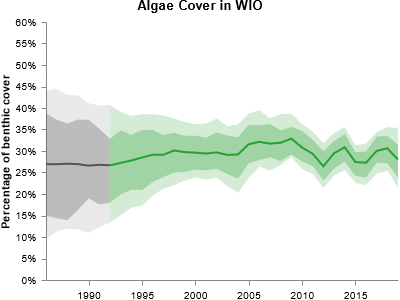

In [4]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Algae cover with confidence intervals",
  "width": 400,
  "height": 250,
  "padding": 0,
  "autosize": {"type": "fit", "contains": "padding"},
  "title": {
    "encode": {
      "enter": {
        "text": {
          "signal": "'Algae Cover in ' +region_name"
        }
      }
    }
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "value": "WIO"
    }
  ],
  "data": [
    {
      "name": "ac",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_dash_02_gcrmn_lhcc_ac WHERE topic=%27Algae%27",
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"year": "date:'%Y'"}
      },
      "transform": [
        {
          "type": "filter",
          "expr": "datum.gcrmn_reg==region_name"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {"data": "ac", "field": "year"},
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale", 
      "domain": [0, 0.6], 
      "nice": true, 
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true,
      "labelPadding": 5
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of benthic cover",
      "labelAlign": "right",
      "labelBaseline": "middle",
      "labelPadding": 5,
      "format": "%"
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_mod",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(!datum.measured)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_mod"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_mod"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_mod"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_obs",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#26a031"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

## Type: ABAB
Regions where the times series data follow an ABAB format (modeled, observed, modeled, observed). The difference between specifications were `region_name` and the years of the epochs.  

### [ETP](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAFEACoABUg4IRG0xC0g2NurHURkBuXURP5+3J8E02j5+gAyilkQBadjoWDIZRgTX07Y1W1gACqbIAMmAnNxrIRWEYjIUwMp0Hh0GArTa7bIWeyuTyAdSJvtWIRQz5bnd8EQSOQbJpzeobHR4Oh1BVS9xUKR0IRGJR0nwAI5GAD8zYAvMbRR7Rc9xWAAFRgABibIA8hywNx4DJAaHYIhATF0oDqPrUPOjIh4PBAeh4GAAOoACVFbNFYAq9fgnYApOkAOyPdDIR9PsAGGkAETAG-ULdATxMBOy+H47g-O4-iTedsQgqCZVhJQAF0JjJMNMBwdF5ShKBlX0Q8dUVVUjHqSAkRufRSI1cttTlAUfUAsNdnOSYWhxKRkzwxJCHUbhWgrJpbn4mwghTAVNRtcimmQctbgzZAsEggBNO4xjwhj9jwLUZFgJjUDRHi5mMxJmlaW4DIDTAJNJa0VUIQTAQATlEQEPEYIMZCKWyBSOPiFLDVhUDoNMnNcgA+GI6AANjANswGiuKcAzYLQsc3wXNEJC2LhDYUNlVD0IQAI1CM3DSQIqBDhKmZiLMjjbh0YlfLJas+j0OYMPDW4iPkKAXGQIxlFuWT5K0xVdOoHEwgiVqhgKbzillCSFUSKrICaWq6n6vC2owLw0XiRLYrQsA9pkRgPEiHSRV20kppxZJUk6QqIDQkJ0EOMrsIxPbfUYLZbnYbgCGreqoG224arLOrWqMdB2CG0dhSXG71DuvaEaRowJysBHCHRkUVr+0kAaB-QZicTpWqh-Qtthna9qmOr9ElXwPF6aaZyZJHvEQK7HCsCHIAMlj9HvHLoSKkIMHUABrAYwBwhY1vYiz9Gofi0xFpx+MM05jNFw9kBOEy2MVDabU0NQD3gLpTJUTDevt+6LagLXuDTdhhM1zd5zxKWIU01qMyw5XjLVrF6RdwFUBWA8IYuL31Gu-RrcB2A7aTxUdPQPSDPK92ICjtjGka9pPO2B3i-2fydn0CoACFuG4GZ84ACgAQlSkLQWtVVbQASiDi2Jot0vSXMnEXCMau3drzZDgC+m5PUDve7oMb1CHgAeTsAEZnOcgAOUfcsdgqx7wj7STlxWi-OSf1Zxcs5JzxI9fB05uvDyBDzjgnTA48-LLFWIbRekA0yKVYpAw45E6bVShv1UWgNhqjTXmMXyFtNoIMZqNZBA00EjUptwGwmVXJYMdvsJo6Q8GlQIfglBg10HUQyuoLK7lkCeRGCAnBs8yI-yFCKW4ABiUQEjJFUMXp-TyuNcjwGYL7LqwjZjRQPgAZj4WXCobcdCEwgTIxIlFBFQGACzJSDwTBvheG8dQdx+p3DZLBO4WBN4ASAniRxKk16uOasgUcvoMB4A3kFEK295CqTuEPRxrwrCuLFiEzeqjIl0HSPeaJjiT4xHvLYmQLg3AeASUEsMoS8BpSMGQzK2ShwHziKkg+ThokQUAMgE0FEllLSmFapMRan1LuHQRpzTIIOK+K5XJrx8muCWEUrAHTN6VPIRw1yfT4gDKGUPVp7SSlJLCelcKohVkNKaZskZjiOSm0QCsVxnS+5yVgIPO0CU7gXPzjzGc7Brb+CpHpb4OAXkrCGraaJoxz7X0Xto-YVzhaGMgQI8iqixHsHYDFGKGiNHSJkagwME4FFKIRQEEROBoqiDyu7Ml5wKULG0c-cuGsoBvxso7UW+tyJh1jvHZQidIWbDAbMZ+iRoFhn5dQxU8Cf6IMgDDBhzDiEYPGtgsuyiGiSoZjKohQ0SFQEWT0zFkDaH0NZlANVcMNWsKgN0jh2S9W12xaYhoiL9DiMkRIm1xc7W4sPPioRhK1F0C0Yqqerc55aFgVikxtxzHMBmMpV8Zg4m+FGU4lxbi9keIDjQbxvisD+MCcxXZ5Twlr0ifeNSMSvgJvsXMnZty6ApIGekzJXxskTOcNM9wyBin5trTqq1vS6lrMGScrZPx5l7MtYCGpA7jnDIyY48ZeSCkzM7dW7tCyqnLMOdO9Zw67htNHTWzeE6VnbqHbOpNFyWDXKwLW-uDz-hPK+K8mQ7zuCfN8N83QsA-lPsBTMZQIKwUXwhYGxU0LfBhvdfCn1wocSiORai9Fbr3Yerxc0AlsHih0CfFSyljtcPwkVbS6etwvJMyg6yn+7LCL7k5dy0DkAZmAsg2XIVmZYW2vFV1SV0rTWoM1fKnYPKaGGpxCanaZqtWCl9chnBsAdLcHlvy6TmGnUutdcJ3Owb9EsfdRG-QUbpiWLjbY+JjjnH4hkK49x-tgKZq+D48sfjGCgjzcE2tESonlruJWrt7nkm+tSY27zLbF3ttmWOwtdBe2Tv7f0s9pz92Ra6ew2LRyd3nvnaIVtUzCkruSyFGLJ74sbJHQV-ZFCt0ld3XOp9lzr23vuY8+KdW3mMg+V8sMX6f0AtUP+wDorpYgdFUkOxCCFNKYw0SqA8GUVooxaMAjQ3gN7CvtS1azMK4e21oTVqX8DbmzLk4E2ZtaVW18JnbOC8y7UYZa7c67rPbe2UZAdNdmijGSpSA3+j89hnZjjRwEb6s5Mr0ynNOkMLu2z6syvOBcgm-YnoNl+lkq4Qeu+6+uTVuAtzbnJGQjWB4PpHqKzTArc5bexfPB7WKsf6CPqffe28PNrxJ8Nxe5OGr0qp+jmnkC6fGrXiz8se9OzpBiAfM+pPL6fZvq1e+SsVZP1h5TxlH8BqUa6rd-++5gf0eZUx8Bh33VsZFUYqVonoaEP4+azamDNOJGVRRfB9NrcsKk0V7KDvjV0IlS741bu5VsIOVwnhS1vd2qm3B9IMV0AxA0QfWTR25GesUehmD03orpAj7okNBjjfhrNFRMxFjY3WPjXYpNFndDWbTbZrxDns25sPXszzpam0+cr6u-zez61pIySFnJYW8t+dKeupZaXT2lb3dstd47UtTuq5lsZ2Xh-LtHwWipG6srpYS2VlvUXj1VcHdP2rLz6sAZvZvO9zXnnPtfe+vwXXZDfrAP8jkf7gVD1Bcjpb62RvgYNwF5QZyJR5IpzZIYR4CKp7eoqIybEp0CkrS7FwEY0oq7c5q4Mb7ZsrOyA567AIMaG5m62qm66ZlxcYqr+5SqB4CarwKrI64J+4MKu5MKSakbb7WoR4GpMFGqbQ0G24TqcGgb7DQZwGqYzYx5x4J5J6kjQFoZO6OonQBoMG546YcaQL6Yl7RrGbl6maJrmYpo2aAQZrUBZpOY5ouYBIH5pRt5lqxJd7lZ97BZZJD6TJLodob49ocFxYn67pJbWEhSCE+EzqnJn4LpuHhb5YBHRbb7Fa+HDL+Fz6H6pZxEhEIQXoX43LX5NYPotbn5tZMjA4frP6-Jv6-p9Zf4-5GJ-7QjCG4BjbqEoaiEOrwEzYIbzYyGMQp7yFgEIE4bIHkqfZEboE4hkbq4srfxa64F3ZA6fL66Y58pkGpjpjCpLECgUHO7MFIKsE25SbbydEiY8Fib8FSaIoR7yb8STYZ7R6x7x6J457aahqNF6ZF6mKQCGYxpWJPC+YGGWa15RZvYN53COZVrN5JE2HFpeb2HxLd5j696BYNoD4uE5buERbRExaL7xGJaz497JFOSYlpFnIr4omRGeHj6Va77T6JG4kpYHKUk1YZFXqX6E73ouh3744P6dY-Kv7v6f4Abf5AZ4bs62qAHjaXHKaKGQCzaIYLZ-6oE3wkwVQCgkaaw7a6ya6lzGweCnbMrnY2wg73bMra59R85lxPaEA+y3CAk0BAZfahzTFK5-a6kA4zF0bsDjHSCqgQ4URQ4GnjFw76QI6-Qc4qGU6zzU4MEC6NA47Br47dzZFE7DyCn-4hnm4qlEJzy86RnLxAGQDi6S5M5C6bzbxs61xk6hnc7hlZnm5RnM7Fms77z5nOTJnLYWxrZCmrby7lgPzBlsTEaq7-Cg5NEak-aA5umdGMaLHPECikHTmkgbE8YnGCYHGKhO6qpLmkIT6UJcG+7cZUHiZdC7EOQh4eReRFBQGgHXFiLqZe51GyI4o9FXkIGaIPF6JPHAG2qaHvGl5fE2I-FfDV6yD-FpTWmmGN7mFgk0lFrlglp2EVoOHRFOFInNquFtoj6wmb6FbeH0kJE4lwl4k9I4WhFJrhFoXr4YVeFbnH6EnUn4W0kUlT4MnnKZFX57I365HskFEdbFHck9Yf4VH8lVEyI1GEYAENEfn8KXliHTZSntGQF3kZnyJerp7SV+pIEQr4ZDGRwjG9SDnjHYFUbTE66AJcruk8qTkWBG7k5QIrHsYSXkGW76C8YSZHl0FCYKWMF7lbF8E7Hu7sET5CEMHcFeW8EHmyq0EWoL4xArn3n2oqYyXOouoxWKUwEqUtHiHRTKFpmPH56c6KhfkfE6HfGV6-E16poAn172bAlN6WFuZ0XQXqCwUd6+YUUBawZBbIV3ChYRHoXlYYnBEZbYkHrgmBFRVEXpFZYkm9XomxHUWDX74jUVabrjVEnn5MlZFsU5FsmtYvrtZFFP68VlG9ZAqCUtnUqk51GjYwr2WyFSXpUJVyULYeVyHKUKGtHRT9EaUoFaVI7urpmQBjFYEjnGm0YJxmWEFTk3UkS2XEFwKOXbHqquWC70Hm5rn7kblQBnEeUXGKYSmtFSk3nJXRlvm5XI7GKvGRo-kmb-nJp-HlUgWVVgXVUQW1XRG2HNUIWLVIUd7dVkUeGtV7L9UrW0WYVLWT5L7EWTVr7819WzXC14Wi1H4rVn6XpXLMkJmsmPr5G7WFGP6fov58V8kDbVEXViXXUqoTZ43iGyUQGymaXgqraKmqybbc7mnqmTGanHbalrFKguk+n6lXammkgg01wobmmWl+zGHva2khx7S3aOlKk4IbQAJ67ukMaempw4gZzQ6uyw66SBmASI59kVkzxo47AY4oZRnNyxmdwa2PKlkoF1F5V0ql2Znl1B2V05m3BNmFnljC47xnV-7tnBznC3wCgK5F0lw6WER6VA0e2jkzGp0TlEFrGCow2r1irw3UG+VB7I3uVBVb1hVsGbmVZE3BWUHeVH1I02UnncJnlE3NHxU3FSH3HPXdGvW9EnTZ4eWqHvl5Xk1XDF7fnaFl7FVmYAWGF15R1AkgnOauZs2Qnt7eYtWOEIn9482oW5bkWy0BUDV74z7DVQVi0EnzWrWkVYMy0zVUXy2EP1Vi2pGkMq0sUsm347Wck8XdZHX8UnXG3CWm2QKilzldGBif020ykP3v1p5vUZWIEiVyk-XF1-UDnvxz0HYNAg2zFZzg0G6Q3WWzlQ37ALlUHOWHl+VuVn2H0Y0A3eFn27kX2hVWNBESMiNPkSG3HSEXkPkf2uOZWvl54b0XAU0GZU26E02AVWb00hSgVmGgms2LXs3IOc1EPc2D5TXYNUOEWMW4W0OK1jVZOS3EnS1omLWe40PlZK35MTV1brWsVRbsXbXa3sMHWcO8kCW8NfVlmXWCMGOKiP2SnSkdGeNKVSOf0fVyP225TDFKPc6A3MoGVTE9R4FzHaMLGWWw0ob6PN1GPeUmPhW277FcGWM70RVP1E041XGqViKSF3FE2-2k1GIAPIiU0gO-kV7gO01lVGGeJVWwMWHwPxOINwWd4wmoPtWIkYNpOUMlPYWVMEPlN5MS1VN3DkOolRHQvUOwsi21oVOIurWq0NZ10cVsN7V60lE8nlE8MCm-78MiniUW3imiMDOQHyMO35RvRgAFSjBAA)
Specification includes an extra transform to clip upper end of error bars to a maximum of 60% when drawing (actual value is preserved and displayed correctly in tooltip).

### [PERSGA](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAAUAKJsgDKzIMkHBCI2mIWkGxt1Y6iMgNy6iJ-P25Pgmm0fP0UpSyIAtOx0LBkMowDr6dsavawABVNkAGTATm41kIrCMRkKYGU6Dw6DANrtDtkLPZXJ5AOpE32rEI4Z8tzu+CIJHINk0lvUNjo8HQ6gq5e4qFI6EIjEo6T4AEcjAB+VsAXil4q94ueABUwAAqMAAMTZAHkOWBuPAZIDw7BEICYulAdQjagl0ZEPB4ID0PAwAB1AASkvFYAqjfg3YApOkAOyPdDIZ8vsAGGkAETAbd1F3QE8TAbsvh+O4vzuP4UyXbEoJg+VYSUABdCYyQjTAcHRJUoSgNV9BPfUVQ1Ix6kgJEbn0cjtUrPVFQFP1gIjXZzkmFocSkVMCMSQh1G4VoqyaW5BJsII0wFHU7UoppkErW4s2QLBoIATTuMYCKY-Y8F1GRYBY1A0QItCFXQzCEACNQTPw0kiKgQ4rJmUjEmaVpbh0YkpMSZRaz6PQ5iwyNbhI+QoBcZAjGUW55MUnSVX06gcTCCIfKgIYChkIocBiBUpOVRIHMgJpnLqcKCLJfyvDReIwBiOgADYMLASqZEYDxIj0kUKtJJKcWSVJOnMiAMJCdBDhs3CMUq-1GC2W52G4Aha1cqAytuJyKxc9LICMdB2CiidhVXLr1B6yr9sOoxpysfbCDOkV8pm0k5oW-QZicTpdo2-RSu28rKqmFz9FFXwPF6ZL5yZQ7vEQDrHCsNbICMtj9EfFCFjhMbEgwdQAGsBjAPCFkKziPP0ahBIzZGnEE4zTj4iKT2QE45iZor6VuO1NDUY94C6DmVGw0KBd6jjEip7gM3YUTKZ3Jc8Ux844VhXasxw4mmbJrEueIo9UBWY81ouaX1E6-Qefm2B+ZNlU9PQAyjNsiXSaF3SuNuFwjG2QXXYFI4BM87gACFuG4GZHYACgAQizVhUDoUFbQ1e0AEplddhKJZ1jjGk99pGB93w-f9lVA52P6FPUKP48TuL1DTgAebsAEYAE525fTOJdVjizN70zdrxwmXfOXO3ILqBKwUu3Ejp1bTmCzXIBPQFDeUY3s4D5ZVkZsuoAzZT2IPyBDko37HI28KUfm6LYursZ0olkqL4B2Lr4iu+Yo+7gbF8QE7dRBP3diqJo6Q37WQ-u-G+kV760UIMJQBwDt4v29hRJeQoRS3AAMSiHwQQkBB955FxurkeAzA5ZBSwbMBqrcADMqC84VAjjoB6+9iGJGohgqAwBgYqQeCYD8Lw3jqDuOFO4bJ4J3CwHXBgCtQI0AkWpauMivLIAnP6DAeBa4RgTnQBu8h1J3DThI14VgZGox0XImhRi6DpEfCYiRAAOGIj4REyBcG4DwlitERl0XgfRRg-4ANcaOVucQ7GtycCYqCgBkAlglYgJ+iMxILCRE+Idw6DRNidBcRXwgHuNeJ41wSwfFYCSXI4J-91DIPCZErJOS07xMSX46xejE6pIAUA+pmTskxOaXkiRHJWaIBWDI5Jidk6wFTg6DsXwRmO2hvOdgPN-BUgMt8HAdwOQrCivaExowe5Z1AUw-YYykYcNPugyiNDcHsHYI1Rq9D6FEOIbfYM05yGUNuQEbBuU6CiD7oPf2wKsbP3Zv7fOFNp7-EwBC+e9NKIa1FuvI2mAzmbF3rMCeZFMwRhxaAxI58l6XzPp-W+UUf5QAbm80+VCGhkv+lA2B39bjVNCTEOlZcSoQNJe-P6FK4HUsgF02prjuVQpuZgv5OI8EEPwZK12HyyEnh+TK4UtC6CMIRQKFhPstAn3edw24fDmAzFUu+Mw5jfD5MkdI2RHT5HAUVkor4KjKxqMYKCTRrF2mBPrtXIxj4NKmK+DasRFS2mTLoLYrJDinFfFcUU5wpT3DIF8X6mNHLxUxF6VEgZLSfiVKdWKwE6SGn9NyY4iRhSPFeLKRmqNWaqkhNqT0jJBbckJOLdGuRZaO2VqaUhO1IyWDjKwDG6ZsywDzJ2QpGQyzuCrN8Os3QsAtkLL2TMZQhzjkgrLpixIFyS5XJ5dK6hsr7mPOea8o9Kp0FfLVc0X5mrih0BfGClWQsv3wghbi6FOIQwyEBlKpFS8UX6zRZvDFurIBlL2Ual+R8CVIeVSSoKZKtosq-lSh+8VdX7AZVRAVNKhVsv0Hc+9XC9LcHxjiwUV79DyoVUql++q2FoahSa-QZrpgCKtSIixEipH4hkDIuRQEQJ4mUaorA6jfXaJjYY4xYa7gRszUpmxsq7EJrU8m+tabykloDXQHN5a82dsaYWu4PaTMpMQZy-N1nq12rrcUht6bNP+NbTUupVmq2DLs320tjn22iGc4FkdwzRkTqnQpGZ-w5kLIXUuldfgIzrs3Ts7dBy05HKJfCU5hHcCiIvrR+jr7-lQBwQ8p5Lyxi-uhEzMFA9wUvT1VPSAUsaa7QXgzSFecnAszZgB4qVs+ZhValCyD08xbTeVT1wgstbhSddUUFr2l1Yi2mjnIWqo9ZzcBMum28L9vSA1Bbdavhra2zgw7J2Wix6u1xR7GFHzfbi1PhXYOYcI4LviynJLGdiugNe-bLr3tPsLe+4cIO+gO5dxbg3ZT1cQcH3veDye72ocly+zyn7VdKyo8rM3Nund277ohELNr37zg4wFCPImJNx77fcjiGeZ2wOLyCrN1eR4Ttbzgwhveg2oUoezGeqFGHGWkfJTA3D8CaWP2ozSyBIMyMK8pUrvabbkFsbzuA9XOJmU7UVyKgdKCSskODFVuV6RGroBiPQ1uBvSSPu+S+jV1WGrpFV40cOBr2Fi+NRaGivD+GWqEda0RdrRO6Ak06tbijqCyc9fJ71GiQumZUyGxN6nY-Nq006uN9jHH6bcYZ7xTb7OJ3MxWvpw7bOtJbaFtJlmh02ZrQU0QKaSnV+8-6oJevB2N5s8F1vpnLeRab93+d47d2TrkdOpLs6UtLMZCstZmXZAbrANs3Zqgd17sK019rp8T2VxD1K0hdvr31bvdbr+nzPfEbuQCoFpyf0tf-WzrrnO54IpwNecdsjtBdYN9sRdCVT4JdoD3kZcSMoF9BsMzdtcRVaV-diMmVyM8Nf4-MJVMC+VMM5dTdypzd1QwsLM3dmJb9vd7dHdndXd-cPdn038mN6ptV-cONDUpceUeMI9zUBNo8hNbURMHVJMFEZN3U5MFNs99Fc9Q0zFC9a9Y0dN41y8XFK8PMjMa85C689cG8u0gsW9i8p9KDDCXNBk593NU0B8i8fMnVzNR8jCi0VDp8AtZ9R1YtF9AdEs3Q51FlF1N8TtV0d9Nl98t0j88sCtOEz9oQSskgyteC0FaDL031mM6tb1qD9gWCKEvc0ifcP04iitQUf9tY-93tgNQNlV+tkVQD+djtVkhdIDsUuMBRYC2jSQECsMcCdcMCn9X5+UkDNccM0DbgqMBjYAKsGN38asHcncXdsj7ZA9ONkjlV+DIA+MLVBEngNMxCxNE9TNk8pC7gPVI1ZDJ95Cg1VMlCLF7Ch9E5S89NNC+9PNjM9CzMDCO8x9u0TCHCzD28Z8u83Ne8q9G1B9s0R8IsPDx8-iHi6B3DO9XMYsF8Jll8EsZ0AjUtgj0s11d9stD99ld18sqc6dD0EjL9ytBJKs6D78sjRgz9f1Wtno7JOt3sltaZgDc4UYRtOjCJDsqIbtJt5t9s+cpt9slsVt5YXUU8qcwVt5l5ntWSX5io14N5AR2BACqIzYrtBTeZTsxY2d9JDIntdsy4sdyYcRccdh8coVCdJhQ5A8Ac44nUV905STz9zTCtAMvYi5odvT7TIBEd25kdq4SdG4PT4iwdvT2dfTi4bSYcCc4cr8Sowy5EG4yd0g4guUv9-Zadqd6dh5KxR4zTWcoVYziI4UtTaiIN6i1SjZNTMV4NWi1j0x8VJdr90NjdNpej0CVcBisCSDez2UoSljEgjchiNcSphyEEkEgExzn8eEGhZjIAWNCFmDSEn08i2D0iOCGEuCVieDOzuMw8eFNjI8djhE9ivh49ZBDj9Fji3VTiZDM9FN-irjKxg1FDw1lCPiniNCk0tDbDwT7jIT8DviXDm9e1LjOlzCILLDose9XidCITfNuloSkTjDoLTCHM5yMKfirCvDUSl9XSMTV8sSN8mQQiMsNk98D9ctiSYjiFij71EjLljyhtUjlz2DVzMiGsNyX9WC78P8WLv9e5f9yz-8qy4MayQCQooN1TGzhcWyOK2zj5WyBRui5cUCyCxiicdhMDuzBUtdhURzwKFzeUjKRjUDTLZzOULKL1uLdzVyFVFUBLVVtzhKOCdUYzDzg8LSuFTzTULzBNrz7UDjHUjjJCnyzivUfUPiFD88NNQLtNNVdMAK7gDNtC7CVD694KosoK3C4KgTkSkKwSvMUrHCoSSqsKiq8KarEL58xkfD0Sgd-D18giqLcSwi6LIiiST9YjQcL8kjVKaDbdaSMib1+KBjcj1UCitVP1cyTlxLyjJLKivBqi0EuTFSFKGzqDmyLBRdwdRV2y4DT4tLhj5dRjbLlcCNvTBzLrSCug9KoAJjvSpjqSZieK1y3KBjuD-LCtAqrhw9zzBCo9djY99iE9IqHzorU9pD08LicLA1Pybify7iVD-z88srgKKrcqviGrCqPiy0LCCrrDQTsqQL8a-NnCEKiaYKETKDaayaiLmq0TSK2rkt51KKt9QjaKCSGKBrmKhqeVKTSVpivLeKpq71GTNt6cWS3ZSQKyoAOS+suSmYeSPBRt9txshSDTS4X4xSRSoVJSqFus4a5SttKpZsWc9gxsBS15BdNS4MLtzYcQJt9b7tjTnZSyXsYzIc-S8dEy7TkzfsnTo5Wq-DlB0dyTozOEfTC54yDakz4coAsy4hQzid0y0dIySjXZ8zUJCzKomclTFblVlbV5pL9tZKGgjbGibYlKWjDqzrlUOiNL9gLqpydLnqbrUy7r46HqpynrWVcCoAnCrd7qiDZdHqZzD4maJ747HLGNnKcF5jGCHLNzX8vLfcDzWEjyAr1ogreMQrhCwrbzxMYbE5Hz4bnzEbXyErri881NkrMa1Cy9sagL+8qaPi8rCaJ9kbGbASYTSq7gbCv68af7qrgHarib57Ca58x02aSLTM3SubAi0tt9+aIicsojGLc7msMcKSRqLSVVJbatpaN7BLPKJqODP8McxKOImEAMK6ACZLtq66nb9qoC+TEg27RqO6rKrqbKKNbqDKBzBHh7yC8D7LCCJHZ6Tr29KGlzl7qtVy17Fj3Kty5qnLCifL47-qeGBQNitihCIbhMbzxCk84a09zj76GbErn7fyGasaK9kKcrIHwK-64SY0Sb8rPDa0Kbcb3iGbx6vHsL3zYL6roHGrEG4tI7MSOqMG+astsHCTj8STT8RaoUxb+GH0uKVG5U+LH9vTZr8idGFrRLSiVq9s1qgMNrqz2G6yBcmjG67SVLjq+GSHO6cRu6R6+j+z7q5GTKRGCmLKPq6MvqV71GmC-q-LDGLgj6BD+NwarzIaLGIqJCZSTjYqM94r7HH7vyC8Ma-y37njAK3Hv6QmCbon6aAHfH4GQSLmIGrmab8LIL-6InAH0KHmUSkHfCEnubOreaaKUn6LcGhb6HCHQE2LT1MMJaaGpaH9GsGGySNh8zsYQBRggA)

### [WIO](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGkAdQAkgB5SBo-GHSmbSDUt6sdR2BFlWyoeUXdnwTTaOX6ADKuSJAFp2OhYMhLJb+SdWr6wABVMUGMDeGxgQisOx2KpgZToPDoMBen2WWQi8VSmXw7mLC6sQjJsJvd74IgkciuTTu9SuOjwcyNZvcVCkdCERiUAp8ACOdgA-AOALzOgCiBkn-wAKmAAFRgABiYs1ErA3HgMgRydgiARqQKCOo9tQu7siHg8AR6HgYFV30nYsnYEaPfgY4ApAUAOzfP8-y-n+YAAII8gAImAZ7qBeCJ0mAY6QtC7wge8sIFru1KoehOo4koAC6ixsimmA4OS+qYlAxr6FeN42oapp2B0kCEq8+jMRa5hMvMRaGlGcEpmcDxLL0NJSIW1FZIQ6jcH06g9G8cmuNE-EXJaPqsd0yDmG8ZbIFgaEAJrvPM1F6gqeC2DIsCCdaFGEbqREkQg9hqEklGbAaWS0VAVxuasjFZD0fRvDozLqSoHbjHo6ykambz0fAwyQL4yB2Mobw6XplkXDZ1A0vEiRRZA0yVDI1Q4Kkur8T5NH8tlgXtPIYDUWyMUhJ5GRgKkdAAGzEW1rIyIwgRJNZKqte1BU0jkeRDM5EDEbE6BXB5FEUu1NiMMcbzsNwBAdsFUDNW8AUtkFpV2Og7AZSuyoHhN6hTe1N13XYmrODdhDPSqtVbayO17XRyDeEMpVnfo3RnaVyxBfoAAK4SBGMhVbkKd2hIgY2OM4J1pTYGC3FA374ZsuIrVkGDqAA1iSXkQPVXTiW81BySWBPeHJDnrNJUDePeyAk-VVKNfoPqaGoCLJcM-NZGW5FQLL02iYa7PcCW7DdGz567nS5MPLiOKlYrnn86Lhp+ZAyUIqgux3idjya+o40S+Eu2wDL14pVFFzWegtn2ebatUaHVmswMjB2Cccvhxc1yydlunqAAFGWrCoHQOXqAAlAAPGOACMACcAAcoiG6HxuiU5as18tpU0-TIeiZbIWR1A5i6U7Ak86xZt0T7dsO5geWiZA2zWHsdzy0xpYpms7cKlcrFQ-5sMC7tmXJ7lfsTzrdxsZdNIwyfqXpTvdHcK44QIiXlfj+HkDdAUa-n9Dm9pdvWWcYQCn30fvvVkvh4ysSVCqN4ABiUQsC4F8TnhcUBn0yjwGYIfeKEC1h9SLgAZifqHLo3BuAxy0CJeOhp2IsX0MAeGhlPjGCCL8CwIIgQOFBOEd4rV3hiiwu8LAGcs6wXgnSbhxkU78IisgFcRMUzpxTJnbOKd5AmXeLnbhHD1D8PsnIwRdAsEqLoAUb8ajuFl1SN+VhPg-BT2QNo2ReB5F4EUXYG+d9zGLiLukQxRdvBqNQoAZAIMI6McXoksACPFeIyO8Ogvj-FoS4ZCB+ljATWP8IEexQlQkKKzq42+6hAGeO8TEuJudAnBIcU4xR4S74PyKdE2JfiykJO4RKYWiBdj8KqVnFE3pTTBmHJCNpgcMZbnYJLSIXJbJQhwO8CUuwMq+jUXMKu4cG6iQIayDp+NZ4UKyMg8B9hIH6Cgewdg-V+q4NwQgvZW94yalQegw5ypsF0FEOso2c8Pl4n3svFmYV9Dd0wMAgW-cj6D2VsPe2yhHabMNFPBZ5DCElgMki5+q8j7r0gBddyF8f671OHC1kGDOhYrPri1q38Mq-2Vm4gp5ibl7Jfm-TFH8oDkqulvalJp-7uNSIyih38wFHywdAuB8CiUKmQQ8+8TyRVHNefgkF-tiGkN+rs25p03QcSgLQ5gqwjJfCYX8Vhth2FOE4dw3h9IZD8L0cI-WNAxESKwFImRWTulKPMCo78pl1GQk0Zk4mnqDExOMaYyE5iUmyF8OkuxWAQmeryXy+pPimnlOhImsJvL6WpFTSU9NLSkmiGjWk2xQbdE5LoMmgpdSolpviUEzNlTs0ALrcUxp8STGtPaZ0rAnremwH6ZYQZczdIQkFGMiZKZdCwBmUMhZqxlDLNWdXRBPz13ZAtacDVgqDnypedAs5FyrkCvjkKlBsqlIHuOb1Ogf5vkETWfzOFfzQo0gTDIFqc80pgvihCm2ULR5ntZAimefNBUosXmiwhGL4pYpxZyqlV92UpxA4Qklx9cWf3PpSy+NLFQKvQ2rNi1luC0yXoRw9JzxWwOIxPRoJCdDqog5qti2rqG6roYaxhYBmEAjYaw5wiSeF8IEVWh1CEnWQnEeYSRjAUTuuDXonOPq-UaO3RW7Jzis6hqMSY-17wo1WNjeWhNLaq01oRJEjtpSM1ZqrTU3N+bO3NO7cW0tpmAjxoczp6tdLCn1oLY2ipHrW21NEC5uzRax0sD7QO3SQ64QjqGeO0Z3BxnhEmbO+dczF1LNzis9dWJ12SqyNs8Ia8yMUeebeyApzzmXOuXMR9eIX3UTrhTOq7V31sw5r9Uq3Njq7qlULEWRpxanQ9tLFWKgyJJR9qlDWWsMGQEkwbdZBCEpK0ZucP51tbYZa9sCn90hTRuym1LL2Ksf0ByDkTVu4dl7+07kK2OqsmWJx3VAUuFdC4509TnXOq6jbKtY4K3rUcY6VY+4Kr7BLAcpwLsXcuJcQfojnp1z5DwqYKmbgzC2t3XtAt7vsv9nQAOHfGbCkFk8djgee1AKD5YRvovfthjeuGuUoZfmhsrhpMNkq-vhpKAWH70eJSy+DbKX7C-xX-NtQDit3M450UVJyCj9XQKkXBRcJdSujpetB17MFEeqkY-nIVVXMZg8-Khbw9UrHoUavjJrARmqE5ayE1rdB2ok3rKT1BnVyddQp6RFm-OqdUYZwN5mwtVr0+GwzxnUleYyXH5TlmAs2YadFptvnqk5us3moLrncIieSSZmx3mtNJrF5F0vefQuZ7805wLtnC3udix05d-a9GDuHWAUdwyJ1CiO1lmdsg51gFmfM1QS6V3K9a1iMHW6dng-Pfu031GoANZPc1sH+zDcyuN5h9Xd73mla+S+35ROAVdzhCd5+Q3eYU-m0PG8CIjs05-WBpem7md-9blsV2cEZOcKVucCMc59cLhBcZcOUWpIDRd8li8YCBcpdSV4C5duUFc+U0Cj9hVt86soFNdtddd8CVcT85UiDFVLclhrcyFWdz17caFuMGEfg3dBNA0rUxN7UA9REZMXU3UI9FEo9fUI13hY8C9dMFVDEk8zELEq841a89ErMc8G1ml88RCs4291Dgs3MK8S0lCzNpD-MUD21c9C0tD49W8i8LCNDy8e04te8Es+lksh9UsRlJ1x8IhJ9pkZ8F158Csitbll8N1BUKtvtGcCDVcqNiDj0msKCL0qCTc1czc70H0r9n165b9n5IdlYQhv1n9ydtsFtP9v8x5ac-9bcFRACajWQ4NMCOdsVsCedoC6CX5QDT5WiCNRUOjYBqtKNz96tSCdc9cOjGM1V6iJ4WCuN9VndeN+NTVgRuDvdeD-c4JHUg9BCQ9hCbDRDlFo8NNhMM9K0-NE8DMFDPNq909TC1CS8O8Qtm19idCi89Cy8YtK9U8bifNtCzCIsosrDm8zjC9FdASu0RM2lnCul+9EtB9h80tvDMtfCplp9Z98tl1Ct0dsd45+c19KtMVBjasaQ99EiWtr964OsAYw4I5781t+suZyd+Y0oxtpiJtmR3YrtvYGJYcJ5KdFteTWRltCBtZdZNjA90dNtTZ38yRCdn4DsgMYV2BSdToXYLs2JptrsBTbsbI7IHtNoKFoixI6TQF3thpPsrgk59BfsS5-sU5EdzBgdSswcjT-kaRTSYdzS4dLTvtedzAHS85C5S4S49csjQ4scMcccm5zAW4DS2478aQSdacX8B4ZTANP9oUERlTJU6dp4gDz06imCSNGisMwCWiudkMoC+dD92UuimoKyRdr5zCldgDX46ycMIDKyeVFckit80id96taMWymVpVHlUi4jXk8EJiGCWMjSshZjIBHcDV2DjUWF3cVjNMeCbU-c-N1tpN3hZMtFQ9FM-ixD1MA1NNTjtNFELiJCU8Y0fiVCs8UD3im9niW9QSU1G9O9DDrjlCry69mzwTNDgTrzXiwTvyISnCe8YSq0B93CESvCx9kTssp9cs59FlMSQi9kwi8TIjpikFDdiSj1GtT0OjRyr0z90i+pL8KFWtvlX0Ey3gkyf0UzwU0zbZMzsyqj6d8zn5CyN82dWVmjENECuzoZqzldOjhKyyEC8UcDaUXz+UOi2yZLuiGz5cmc3jlKayL1iKaNaNezj8xyqKd8+olUpLJibcizCEFylyFiOC1yuDNy1jtzxNdz+D9zDz5MTyXivV1A1MJCpC-jbzk9FDvj-y7js8HjLCnjTDdCYqHDPijCIqTC-irN7D9D7M-i29MqPiu8oSYK+84K4SELPDR8p0J9UT0KMTF9QjnTN18KbKQEiKb0SSEiyLdKKLT99KMjcKKSNlcjCF8ibZCiVTf1ht-0OLFSsz9dczEVmr55UVFqLgSyEMeiCUki4Dmi5K8NNKJykiBi5Ias2qxVDLpymNGDBLmCOMHc2CXclj1zzVhMtzfd3LFE9ztiDyhCw8lMQSs4zygrLzTDQqrjjCa8ALVDorgLsq-KEqYbkq-y0q-KMqG9HiQL3z-q6Bcq0bYqDDoL4tYS3CBlyr0sUK-C0TAjMK6qcKGqIjt0qtjqhj0j6sOrmt6L2scdqTvIetXthTGTJrLYWTAhxtrZJZPZuTfY5tEoP8pb6TNYRTVtPrzJQd2oIVdsaSSMFTyjqdlTacztXYaRxaZttS8jdTg44yntLLXsPTThBTCF4drSS4Qy7T-SVMkdsSKZMdObzhccLh8dHs9smLAVH9xq2KpqZbIUdavZuLf9eKCKtLlrrriz2zwCkNGzUM94pLtrZKNqmyIstqMDSz1LOyM7IAcajLCD+ziDRjyDyLjLKLeq+oCgLqpiVqFQ7L7rFjOCPdVjRM3K+DxSBDvrdjfrTzDjxCY9gaQrZCw1LjI1wqHzIr0robIKMb4rtKEau8vil7kaPzcl68EbrD97sa7DcakqCre0XCiaksSax0kLKqUScsAi8sgisLPan1cTV8mrk6J4+yDqTk2bK6jdqDq7XlaLcSBrVa1Y31idQ7kySj+To7Zqczqj27y6F4Wdf6GjU7yzS79r2jdKc6S7079r7jC7cHdqkDcDc1gHeqRitcxjgGUjTLb1zLW7rLsGZjbrWD5ieNHKBNe6XL+63rB6REvKfrfKT7Aap6TiQbZ79M7zF6y0IaoqlKj7QLPV4a17HCPNwbbiV6gKdH3hj6sacat7ISr7YK-N4K76R8ybp1qqX6MKF8sSl86bz0f7XT-7hjSTOqpLurQGAG+qwzKSci5ThrXtP0ijCFw639I70zbxv9Y7n40GuGsgBLXS1qZdRL5K2jJLWzKG86oA+jdKjryNmaBySDGG67dKrKrq5ytVngdVFyu6BHljnqvcRHZAdyPrPKvrvLjzw8-KZHjjOFIaE8FH5CF6kbVHDGvz0bYaT7tHFnEb9HfiUbD7jHTGwLT6ILVnL7oTiqbHSq7HETkLHHn70S36aa6KPHn4vHSMmb6G-H2aoHIzfalowAnI5ggA)

### [ROPME](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxbIA8gAFDkAUUg4IRG0xC0g2NurHURkBuXURP5+3J8E02j5+gAyilkQBadjoWDIZRgbX07Y1e1gACqbIAMmAnNxrIRWEYjIUwMp0Hh0GAbXaHbIWeyuTyAdSJvtWIRwz5bnd8EQSOQbJpLeobHR4Oh1BVy9xUKR0IRGJR0nwAI5GAD8rYAvKbpV7pc8ACpgABUYAAYuKOWBuPAZIDw7BEICYulAdRDagF0ZEPB4ID0PAwAB1AAS0rZ0rAFUb8G7AFJ0gB2R7oZBP59gAw0gAiYE3dRt0BPEwG7L4fjuT87j+FMF2xSDoLlWElAAXQmMkI0wHB0UVKEoFVfQjz1ZV1SMepICRG59DIrVK11BUBT9ICI12c5JhaHEpFTfDEkIdRuFaKsmluASbCCNMBW1O0KKaZBK1uLNkCwKCAE07jGfDGP2PAdRkWBmNQNFeLmEzEmaVpbkMoNMEk0lbTVQghMBABOURAQ8RgQxkIo7IFI5+MUiNWFQOgM2ctyAD4YjoAA2MAOzAGL4pwLMQrCpzfFc0RkPYuENlQ+U0IwhAAjUYy8NJQioEOUqZhI8zONuHRiT8slaz6PQ5kwyNbmI+QoBcZAjGUW45IU7TlT06gcTCCI2qGAofOKeVJKVRJqsgJo6rqAb8PajAvDReIkri9CwH2mRGA8SJdJFPbSWmnFklSToiogdCQnQQ5ypwjF9v9RgtludhuAIWsGqgHbblqit6raox0HYYaJ2FZdbvUe79sR5GjDFKxEcIDGRVW-7SUB4H9BmJxOja6H9G2uHdv2qZ6v0CVfA8XoZtnJlke8RBrscKxIcgQzWP0B9cuhYqQgwdQAGsBjAXCFnWjjLP0agBIzUWnAEozThMsWj2QE5TPY5VNrtTQ1EPeAujMlQsL6h2HstqBte4DN2BErWtwXPFpYhLS2qzbCVZM9WsXpV3AVQFZD0hi5vfUG79BtoHYHt5PlV09B9MMiqPYgaP2MaJr2i87ZHZL-YAp2fQKgAIW4bgZgLgAKABCNLQtBW11XtABKYPLcmy2y9JCycRcIwa-duvNkOQKGfk9RO77uhxvUYeAB5uwARhclyAA4x7yp3CvH-DPtJeWleL84p41nFK3k3PEn1iHTh6iPICPPHROmAJ7+WWKsI2S9IAZiUmxKBhwKL0xqtDAaYsgYjTGuvMYflLZbUQUzMaKDBroNGlTbgNgspuWwU7fYTR0j4LKoQghqChoYJopldQ2UPLIC8iMUBuC57kV-kKEUtwADEohJFSOoUvL+Xk8a5HgMwP23URGzBiofAAzPw8uFR246CJpA2RiQqJCKgMAVmykHgmHfC8N46g7gDTuGyOCdwsBb0AsBPETjVLrzcS1ZAE5-QYDwJvYKoUd7yDUncYeTjXhWDceLUJW81FRLoOkB8MSnGnxiA+OxMgXBuA8Ik4JEYwl4HSkYchWUcmjkPnENJh8nAxMgoAZAIYJJPKelcKNSYh1IaXcOgTSWlQUcV8NyeTXgFNcEsYpWBOlbyqRQzhbl+nxEGcM4ebSOmlOSeEjKEVRBrMac0rZoynEcjNogFYbiun93krAIeDpEp3EuQXXms52A238FSfS3wcCvJWMNe0MTRgXxvkvHR+xrkiyMVAwRFE1HiPYOwWKsVNGaJkbItBwYxSKOUYigIoicAxVEPlD25LziUoWDol+FdNZQHfrZJ2YsDYUXDnHBOygk5Qs2OA2YL9EgwIjAKmhyoEG-yQZAWGjCWEkMwRNHB5cVENClYzWVxDhqkKgEs3pWKoF0IYWzKA6r4aarYVAHpnCcn6rrjisxDQkX6AkVIyRtqS72rxUeAlwiiXqLoNopV0827zy0HA7FpjbgWOYDMFSb4zDxN8GM5xrj3H7M8YHGgPi-FYACUElieyKkRPXlEh86lYlfETQ4+Zuy7l0FSYMjJWSvg5Mmc4GZ7hkAlILXW3V1q+n1PWUM052yfgLP2VawEtTB0nJGZkpxEz8mFNmV2mtPbFnVJWUcmdGyR13HaWO2tW9J2rJ3cOudybLksBuVgOtA9Hn-GeV8N5MgPncC+b4H5uhYD-OfUCmYyhQXgsvpCoNyoYW+HDR6hFvrhQ4jESitFGL3Ue09fi5ohK4PFDoM+alVKnZ4fhEqulM9bjeWZtBtlv8OVEQPFynlYHICzKBVB8uwrsxwrtRK7qUqZVmrQVqhVOxeW0KNTiU1u1zXasFH6lDuDYC6W4ArAVMmsPOtdW6kTecQ0GNYx6yN+ho3TCsfGuxCSnEuPxDINxHiA4gSzV8XxlZ-GMFBPmkJdbInRIrXcKt3aPMpL9WkptPnW1Lo7XM8dRa6B9qnQOgZ56zkHqi90jhcXjm7ovQu0QbbplFNXSl0KsXT0Jc2aOwrBzKHbtK3u+dz6rk3rvQ8p5CV6vvMZJ875EZv2-sBaoADQGxUy1A2KpI9jEGKeU5h4lUAEOovRZi0YhHhsgb2NfGla0WaV09jrImbVv6GwtuXJwptzZ0utr4LOOdF7lxo4yt2F0PVex9ioyAGb7NFBMtS0Bf8n57HO7HWjgJ33Z2Zfp1O6coaXbtv1Fl+dC7BL+5PIbr8rLV0gzdj1DdmrcFbu3eSMgmuD0faPMVWnBV522zihej3sXY-0MfM+B8d6efXqTkbS8KeNQZdTjHtOoH05NevVnlZ97dnSHEHKZOr5fdvm1B+ytVbPzh1Tpln9BpUe6ndgBB4QcMZZcxiBR2PXsdFcY6VYmYZEIExaraWCtOJBVZRAhDNresOk8VnKDuTX0MlS7k1bv5XsMOdw3hy1vf2um-B9IsV0AxE0YfOTx35FeqURh2DM2YrpAj3o0NhjjcRotNRcxli402ITfY5NlndA2fTXZ7xjmc15qPfsrzZbm2+cr2ugL+yG3pMyaF3J4X8v+bKRu5Z6Wz1lf3Ts9dE60vTpq1l8ZOXh8rtH4Wypm7soZcS+Vlv0WT3VaHdPurryGuAdvVve9LWXkvrfR+vw3XZA-rAACjk-6QXDzBSj5bG3RsQaNwF7QbyJR7IrzbIYR6CKp4+qqKyYkp0BkrS4lyEa0oq485q6MYHbsouxA564gKMaG5m52qm56blzcaqr+7SqB6CZryKoo54J+6MKu7MJSZkbb42oR6GpMHGpbQ0G26TqcFgb7AwZwFqazYx5x4J5J6kjQHoZO5OqnSBoMG566acZQIGYl4xombl5mZJoWapq2ZASZrUDZrOa5quaBIH7pRt7lpxJd4VZ94hbZJD5TLLqdob69ocHxYn57rJbWGhSCE+GzpnJn6LpuERYFYBExbb4la+EjL+Fz6H5pZxEhGISXoX63LX7NaPqtbn7tZMgg6frP5-Jv5-r9Zf4-7GJ-7QjCG4DjbqGoaiGOrwGzaIYLYyFMQp7yFgEIG4bIEUpfbEboE4jkbq6so-xa64H3bA5fL65Y78pkHpiZgipLECgUHO7MHIKsE27SY7ydGiY8Hib8HSZIoR4KYCRTYZ7R6x7x6J4546ZhqNH6ZF5mKQBGaxrWJPB+YGFWa17RbvYN53BObVrN5JE2Elreb2EJLd5j695BaNoD4uG5buGRbRGxaL7xFJaz497JHOSYlpHnIr4omRGeHj5Va77T6JG4mpaHKUm1YZHXqX5E4Ppuh34E4P5da-Kv7v6f6Abf7Ab4Yc52qAETaXEqaKGQBzZIaLZ-6oG3ykyVQCikZay7Z6ya5lwmweBnYsoXa2yg4PYsra79T87lzPaEC+y3CAk0DAbfZhzTFK7-a6mA4zH0bsDjHSDqiQ6UTQ4GnjHw4GSI5-Sc4qFU5zw04MGC6NC44hoE49zZHE4jyCn-4hnm4qnELzx86RkrxAGQAS4xCiDM7C5bw7zs51zk6hk87hlZnm5Rks4lls4Hz5mxTJkraWzrZClrby6ViPzBnsQkaq7-Bg5NEam-ZA5umdFMaLHPECikEzmkgbG8YnFCYHHKhO5qrLlkIT5UJcG+48ZUESZdC7GOQh6eTeRFBQGgHXHiIaZe51FyK4o9HXkIFaIPH6JPHAF2qaHvGl5fG2I-FfDV6yD-HpTWmmGN7mFgk0nFqVilp2GVoOHRFOFIktquHtoj6wmb5FbeH0kJE4lwl4m9K4WhHJrhHoXr6YVeHbnH6EnUkEW0kUlT4MkXKZFX77I365HskFGdbFHcm9Yf4VH8lVGyI1FEYAENGfkCJXliEzZSntGQH3kZkKLerp4yX+pIGQoEZDFRwjF9RDnjHYHUbTE65ALcrum8pTkWBG4U7QIrEcaSXkGW76B8aSbHl0HCaKWMH7lbF8E7Hu7sET5CEMHcHeW8GHlyq0GWoL4xCrkPkOqqayUuquqxVKUwGqUtHiExTKFpmPH55c7KjfkfE6HfGV6-E15poAn14ObAlN6WHub0UwXqBwUd5+aUWBZwbBYoV3BhYREYUVYYnBGZbYmHrgmBHRXEXpHZYkl9XomxE0VDX76jWVZboTVEnn5MlZHsU5FsltavodZFFP58VlF9bApCWtk0pk51FjawoOWyHSUZWJXyWLaeVyEqUKGtExT9GaUoHaXI4erpmQBjFYGjnGl0aJzmWEHTm3WkR2XEHwJOXbEapuVC70Hm7rkHmblQBnGeUXFKYSmtFSm3kpXRnvl5Uo4mKvFRq-mmYAUpp-EVWgVVXgU1WQV1XRG2EtWIVLXIUd49XkUeFtX7IDWrV0VYXLWT5L4kVTVr4C39VzUi34Vi1H6rVn5XrXLMkJmslPr5F7WFGP5fov78V8mDbVGXXiU3WqqTb43iFyUQGylaUQpraKlqxbY87mnqmTGaknbalrEqguk+n6nXammkig21yobmmWn+zGEfa2mhz7R3aOlKm4KbSAJ67umMaelpw4iZww5uxw56SBlARI79mVmzzo47CY6oZRktyxldya1PJlkoF1H5X0pl2ZkV3B1V05m3DNlFmVgi67znV-4dkhznB3wCgK7F2ly6VET6XA2e1jkzFp2TlEFrFCqw1r3ioI3UF+VB4o0eXBXb3hVsFblVbE0hWUE+XH3I22Wnk8LnnE3NEJU3FSH3EvXdFvW9GnTZ6eWqEfn5UU1XDF4-naFl4lXmaAWGF17R1AkgkuZubs2Qnt4+atWOEIn9681oV5YUVy2BWDV74z4jXQXi0EkLVrVkXYOy2zXUUK1EMNXi2pFkOq2sUsm367Wcm8U9bHUCWnUm0iVm1QKinzldHBhf220ymP0f1p7vWZWIGiVym-Ul3-WDkfzz2HYNCg2zHZwQ0G5Q02VznQ37CLlUEuVHn+XuXn1H2Y2A3eHn17mX1hXWNBGSOiPPkSG3HSGXmPmf1uNZVvl56b0XCU2GbU26G01AXWYM2hRgVmGgls1LUc0oNc3EM82D7TU4PUNEVMV4V0NK3jXZNS3Eky1olLWe60MVbK0FOTX1YbVsXRYcU7U60cOHVcO8mCV8PfXllXVCOGPKhP2SnSkdFePKXSNf2fXyMO15TDHKM85A0sqGVTG9R4FzE6MLFWVw2oYGMt3GM+WmMRW277FcFWO72RXP3E241XFqXiKSF3HE1-1k3GKAPIhU2gN-kV4QN03lVGFeLVVwMWEIMJNIPwWd4wloMdWImYPpNUOlM4VVOEMVP5OS3VN3AUOolREws0Nwui11qVNItrVq2Nb12cXsP7X60lE8nlG8MCm-4CMikSWW3iliODOQEKOO0FTvRgCFSjBAA)
Specification also includes upper bound clipping for drawing. The specification for this region is representative of the group.

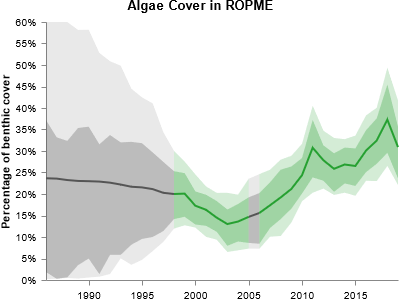

In [5]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Algae cover with confidence intervals",
  "width": 400,
  "height": 250,
  "padding": 0,
  "autosize": {"type": "fit", "contains": "padding"},
  "title": {
    "encode": {
      "enter": {
        "text": {
          "signal": "'Algae Cover in ' +region_name"
        }
      }
    }
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "value": "ROPME"
    }
  ],
  "data": [
    {
      "name": "ac",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_dash_02_gcrmn_lhcc_ac WHERE topic=%27Algae%27",
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"year": "date:'%Y'"}
      },
      "transform": [
        {
          "type": "filter",
          "expr": "datum.gcrmn_reg==region_name"
        },
        {
          "type": "formula",
          "as": "upper_95_ceiling",
          "expr": "datum.upper_95>0.6 ? 0.6 : datum.upper_95"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {"data": "ac", "field": "year"},
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale", 
      "domain": [0, 0.6], 
      "nice": true, 
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true,
      "labelPadding": 5
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of benthic cover",
      "labelAlign": "right",
      "labelBaseline": "middle",
      "labelPadding": 5,
      "format": "%"
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_mod_a",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(!datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=1998"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_obs_a",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "1998<=year(datum.year)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=2005"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#26a031"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_mod_b",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(!datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "2005<=year(datum.year)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=2006"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_mod_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_mod_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_mod_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_obs_b",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "2006<=year(datum.year)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#26a031"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

## Type: BAB
Regions where the times series data follow an BAB format (observed, modeled, observed). The difference between specifications were `region_name` and the years of the epochs.  

### [East Asia](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAFF0LA8GADFVMOCERtMQtINjbqx1EZAbl1ET+ftyfBNNo+foAMopZEAWnYEuQyjA2vp2xqdrAAFU2QAZMBObjWQisIxGQpgZToPDoMA22Cu2Qs9lcnkA6kTfasQhhny3O74Igkcg2TSW9Q2OjwdDqCpl7ioUjoQiMSjpPgARyMAH4WwBeU2iz2i54AFTAACowAAxNkAeQ5YG48BkgLDsEQgJi6UB1ENqEXRkQ8HggPQ8DAAHUABKitmisAVBvwLsAUnSAHZHuhkM+X9KaQARMBbuoO6AniYBdl8Px3F+dx-Mmi7YpB0GQPKSgALoTGS4aYDg6KKlCUCqvox56sq6pGPUkBIjc+hkVqFa6gqAq+kB4a7OckwtDiUgpvhiSEOo3CtJWTS3AJNhBKmArajGFFNMgFa3JmyBYFBACadxjPhjH7HgOoyLAzGoGi+GoShEDoYi5YzAMYC4QsSqJIRUCHAgAR1JJiTNK0tw6MSHkqDWfR6HMmERrcxHyFALjIEYyi3HJCnacqenUDiYQRP5kBDAUMhFDgMTypJDkEfS8WuTMXT4WSgVeGi8RgDEdAAGzoWAVUyIwHiRLpIqRVVKU4skqSdGZYAWaUhxqMZeGkn6jBbLc7DcAQNYkYk5U4i5VnuVVRjoOwMXjsKK7deovW7ftMVTlYe2EKdIqFRiVVzQt+gzE4nSZRtZXbWtkzMBV+gAAq+B4vSpXOTIHd4iCdY4Vh-ZAhmsfoj7IbCaEYRg6gANY2XZEDFY0nG3NQAnpojTgCUZpy8VFx7ICccx045pX6DGmhqEe8CVexyqZthUARW1fOJGT3DpuwIn6IBwF4uj7FwrCmUC9N7HFVibNC4e3DsLAR5-RcEvqF17O+PN+sRSzkx6QZfo07Z1uE07ypeTiLhGNsvOi-sRz8T53AAELcNwMzoDIAAUmasKgdCghK6p2gAlArPtJXzGvscT3ntIwnu+N7PuLIc-v6Al6hR+GMd0OXScADxdgAjAAnM3USp6LSvsaZfNd+ZmXY3javnJnnkk0R-yYP5+xU6tpyhYLkDHoCuuW2M0-KksFirLTRdQOmSlsXvkCHBR336FtbldEj82xfF8k7OnouQNLIXn1ATTfZFN8xXFb3cDYXwgJm6iHXi7RITR0hn1+mXL+UVb5-33oQISwDQFPz5jfIMFEhQiluAAYnSE1dAMQADMjcwF70SB7IwU5cjwGYK-BoODZiNXSOgrOFRQ46DurvSh60LTUSgMAKYMwVLvjMK8KwdxIp3DZHBO4WBo6x1louPEMjVIPwUb5ZA457bhkrngau5d5BqTuEnGRkjfAKORngAx1dmEmLoOkR8ZiZEAA4YiPheM4VwW9kDWL0bYpRdAjAAKAR4kcjc4iOMbk4MxkFADIBDBGxdjY7phQREqJ8Q7h0FifEqC0ivggK8a8GQLg3AeACSxIJVdY6hMAeoVBkTok5LyUnRJyTAmpLoOkoBIDmnZNyXE9pBSZEckZogFYCjunx1gIne07YvjjPDpDOcetfD+CpPpb4OA7gchWDFO0ZjRgdzTi7dh+xJkI14cfah2CAi4P0Hg9g7AmpNRISQihlDME0LoQw+5woWF0FEH3RW1tQXQg3qPDiOchaT0NsqWeDsGiqyIjrPWBsLmbGWDvZmx8D7hlmNC-Yp957vxPnAn+d8y4Py+cfRhlEYEf0pdFalUB6nhJiHSouL8oFkqZS-FlCC1TIM5dyn2PyAWPKgAQohpDyFYpnnnX5x5-nz2YcUOgJDFWuxDp7LQR9vlUXIvoYRANlIPBMB+bxUiZFyPxDIBRwSVEgRoOozRWBtG6Oqd04xpjzFfEseoKpGAamGNjg4nJzjXFfA8SUnxFT-FYBScEjljTMktKGfkpJPwU21J6aK9NMQBkxOGYhQpdxineLKb49wSa83hpCWExp-SsmluzZ0n1wTekttECW1pZbRlLImVMrAMz5JzP+As4dKzGRrI5ps3QsAdlLIOTMZQxzTmd3ORvS5bwdg3J5Xc9VDycTPNee8z5OqqHKtoaq5oUqgUvghRCcFdN2HQuzjiYMMgdoSqRRRVF2sV4YswFiyAW8DmGowQSrMh6JWkrfgKy+FVv6ssQS-Wl16P7QKvrA36aHhX6A1dhyiuluA4yJYKU9+DCHELIeK5+nD9U8LxXwqAxrbhmumBa8RNqrF2vkYo-NLq1FfA0RWLRjBQTetDb6h+JjHzqQDXcINIb9HBMjU4lxKm43VvKX49TYbq5psBBmwZbSOm5q6d2wtZni1toHfklxMiq2lIM3Woz3TTOtszZZu4OaG3Vx7U0xzWaRkueHSwUd46E5TrAIsvZ8kZCrNXhs8MS6V17LXUcpOJzwHwh3S7JI+6z7kco4+-BLy3kfLGC+6E76TKPRmgKN2pNyZ3UygB+DiKGZM0-U5Si5subC2tgvcKPM+oSvFpLV+kBRM0C3Q184T9xs4TpgNrWS9DyoBWAbXdHHjamw48Ny2k2xu6XDnbICw9RbEtduPeB+cdhTe+X7A9kwg56uSxHAAhME2Z8yU5Fb3vdsesLMFe1e8fd7twW5twbuXeTFZgd7x1WDmF7s85Q5Fm9kuH3MMVmR+oeuTdW4viW6+n2PcwXnHGgKQe+MNsXce0veFB2kbU0A1hCbgJdvKExRzyDuL7uQFg0SgrJ9cOA2ckK3+99EoHf2Ay8ln8CPwPl--BpqDGMYMgdLnEaur6Ec10glBIDddZ2PSFDVTzRD24d5b0k1C730IfSewFmrG7aqV7qrhBqesSs46akRvGrUSP3RW+1ugnUie3Kot14mPVeps-mv1SmY2qcj8m1PjatPRt054-TtbKk567fm0z5n20jMC7n4Ldmq9OYixWtzCbDNl7k6m5toW-ODtr+XxtIXfMWcHZFpL0WN1joBxO+ZCWZ0pbnWlvwGXZDLrALs-Zqh12boK-VhYOqSvXLY7c5VlWnnVcvU7pit6-nu5tzR-KwK9-Le3b3KFLOIcVnkgiqhXP55Ae2z5z2zAyFxxQl3xQzEJWg2fkQwaHJRQ3cg1zZUJ0fl9wgQNx+mNyQIw0ry5VI3135Tw2ZXVypQwxCw8SvyVSwQ92lUgDwQd0d1Ixd1vwZVtwai1VI2Y24WgKDwERNSEVDzEXD342DUEwdVj0bQW2oHdUk09Wkx0Tr1jnT2UwsWzyCwjVPUcQL3cSL3cxL3rUUKbW10b3Cys3UILQyQc172cxb1EHjRrUTS8y7212H2rzMMMKHz7TC38zH3GQn2mWnzi1dES2WQXyZCX0XVXyy030OQ3Ty0pxWxBx5SuQLkDyt1PxoLPQv1qyYJv3vVYIf3YOfXOTfTf2ZwlTazei8D-Wfm6xCgAOXn50FzG2F3AJ5XFx4KzlgMZSIIpRIPQwV1QMlxVwFSN1Q2wNuBIzQI43KyozYLoIYPt0oL9xY06IwWDwEPNSEKeDUzEJj2E0kPj1dWkKT1kJTwHyMQU39VUKkQ7w03zXzx0x0PsI81L3MNwP7VMIC07U73zXIKsJHxsNczsOL0cLuOMzqW71cKb3cIuLSTs2hK+N8JHUn1i0nWCPn1S3WWXy2TXw3xyziPyz4Wf3hF90P1SLflmLPxlWyKvT3xfVBRp0hSelJEqKgBm06yqjqMziRj6zWJKmJDNk5jO0LizgaMm1xwwQ5KllJiOPlkaxWxVh53WwzjG0G2XlXkBHYB-0O3VGOyG2FO5h1MaFtkMlu1VL4S-VuA9hx0l1h30AqGDlDh+0CPROUFRyLnR0lzZMhwLmhx5XtKgHhxfERwfmJw9LOWpwVL2Hp32EZ3NPsg-xxC-ynjG25LW2A01O1PA1aP5MSA6LSNJG6PgLl2QPLmWPQMIJl0FX6KI3ZShLQWmN5QwPwywNIJFXN0bMl2tyYUKLoLo3lQrKexVTdwKM90fzYSbK4ID2PyNT4K40EMtR2Mjz2NkAkOrikJkODTkJk0MOUMzzU3BO6UeMzz0z0LBPeO7xMP8371+MHwbwBLcKHUrRBPPPb0vJcK8OsJrx+PuPvM7M+J8IrT8MmVRNdNnxCOSyxIXRX22XX1XS31yyJMoRJIPxSI+wx0lUyKqwvRyKbOYPyOpMahBRKMjMVnfwqNZxTONPTPFJA31mzNAO3jaIlQLNnIQxbNl1rNNxQKHJfk4prLbIGK1zFXwL5SQ16LGMQPbJogfL4p7Oo3HJlQHIY1yKDFdzVXvyUsah929L1W4MLKzg2MgG41ESXOtV2K+GjzXIOI3LlMTzuAk23POLvMuIrEUxUMDTUMMJPMLxeP0KcIryvMfJhO+OszhIsM5UAtH1sP8ovMMJ8y-MBJ-PCtcvhIAu8JirGRRICPzUB3i0gtnXCOxMiLgvxMQsJISKp09LJPQrzMRQyK0toPPRqyvXwryNHKIroGKLR1KPIvKKY1Zx-RqIwVouVMzIxUYpaLAPqrF0gLg3YpgIEoQOvmEo-iwybJGMktLIwymMl0lAEgq2wqeRUoVSnP0pnIx34SuEERMsXL40stkSE2dXspOMcuT3kNkz-LcvUA8oPO8oit8ueNBPfISuCuio7VSu+vSqisyqBKKVfLb08yPOcL6SSqfNvOhsit7Qhub2yv8KnzypnwKsxMXxKtgrxIQtiJ32JKSIlTqrJSpOOppNwrpL6sSLp1GlMlGCAA)
This region is the only member of this group.

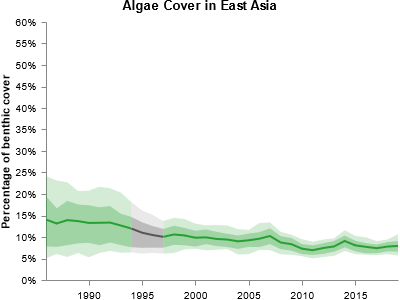

In [6]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Algae cover with confidence intervals",
  "width": 400,
  "height": 250,
  "padding": 0,
  "autosize": {"type": "fit", "contains": "padding"},
  "title": {
    "encode": {
      "enter": {
        "text": {
          "signal": "'Algae Cover in ' +region_name"
        }
      }
    }
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "value": "East Asia"
    }
  ],
  "data": [
    {
      "name": "ac",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_dash_02_gcrmn_lhcc_ac WHERE topic=%27Algae%27",
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"year": "date:'%Y'"}
      },
      "transform": [
        {
          "type": "filter",
          "expr": "datum.gcrmn_reg==region_name"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {"data": "ac", "field": "year"},
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale", 
      "domain": [0, 0.6], 
      "nice": true, 
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true,
      "labelPadding": 5
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of benthic cover",
      "labelAlign": "right",
      "labelBaseline": "middle",
      "labelPadding": 5,
      "format": "%"
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_obs_a",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=1994"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#26a031"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_mod_a",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(!datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "1994<=year(datum.year)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=1997"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_obs_b",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "1997<=year(datum.year)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#26a031"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

# Multiple Region Specification
By omitting modelled points and retaining only 'observed' ones, the data for each region are simplified and become structurally homogeneous, allowing for a single specification to encompass all regions without drawing errors.

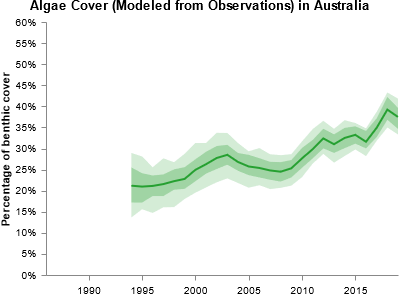

In [7]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Algae cover with confidence intervals for all regions",
  "width": 400,
  "height": 250,
  "padding": {
    "left": 0, 
    "top": 0, 
    "right": 0, 
    "bottom": 5
  },
  "autosize": {"type": "fit", "contains": "padding"},
  "title": {
    "text": 
      {"signal": "'Algae Cover (Modeled from Observations) in ' +region_name"}
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "bind": {
        "input": "select",
        "options": [
          "Australia",
          "Brazil",
          "Caribbean",
          "East Asia",
          "ETP",
          "Pacific",
          "PERSGA",
          "ROPME",
          "South Asia",
          "WIO"
        ],
        "name": "GCRMN Region "
      },
      "value": "Australia"
    }
  ],
  "data": [
    {
      "name": "ac",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_dash_02_gcrmn_lhcc_ac WHERE topic=%27Algae%27",
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"year": "date:'%Y'"}
      },
      "transform": [
        {
          "type": "filter",
          "expr": "datum.gcrmn_reg==region_name"
        },
        {
          "type": "formula",
          "as": "upper_95_ceiling",
          "expr": "datum.upper_95>0.6 ? 0.6 : datum.upper_95"
        },
        {
          "type": "formula",
          "as": "upper_80_ceiling",
          "expr": "datum.upper_80>0.6 ? 0.6 : datum.upper_80"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {"data": "ac", "field": "year"},
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale", 
      "domain": [0, 0.6], 
      "nice": true, 
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true,
      "labelPadding": 5
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of benthic cover",
      "labelAlign": "right",
      "labelBaseline": "middle",
      "labelPadding": 5,
      "format": "%"
    }
  ],
  "marks": [
    {
      "type": "group",
      "data": [
        {
          "name": "ac_obs",
          "source": "ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80_ceiling"},
              "fill": {"value": "#26a031"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#26a031"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

# RW API
Parent dataset [bio.024.rw0 Local Threats to Coral Reefs](https://resourcewatch.org/data/explore/bio024-try-2) ([Admin](https://resourcewatch.org/admin/data/datasets/d553a58a-faa2-480d-b137-c96d76d5ccab/edit))    
[API ID](https://api.resourcewatch.org/v1/dataset/d553a58a-faa2-480d-b137-c96d76d5ccab/) `d553a58a-faa2-480d-b137-c96d76d5ccab`  
[Widgets](https://api.resourcewatch.org/v1/dataset/d553a58a-faa2-480d-b137-c96d76d5ccab/widget)

Lightly modified version of widget passed to API via [widget scripts](https://github.com/resource-watch/data-team-tools/tree/master/advanced_widget_writer). Key variables to modify in script, besides specification itself:

In [2]:
dataset_id = 'd553a58a-faa2-480d-b137-c96d76d5ccab'
name = 'Algae Cover in <GCRMN Region>'
description = 'Algae cover with confidence intervals'

- [Australia](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [Brazil](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [Caribbean](https://api.resourcewatch.org/v1/widget/b689c8c9-502a-4eaf-a381-baa03984cef9?env=production)  `b689c8c9-502a-4eaf-a381-baa03984cef9`  
- [East Asia](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [ETP](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [Pacific](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [PERSGA](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [ROPME](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [South Asia](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [WIO](https://api.resourcewatch.org/v1/widget/test?env=production) `test`  
- [World](https://api.resourcewatch.org/v1/widget/3297d38c-15f6-464d-abb6-a5b58c68606a?env=production) `3297d38c-15f6-464d-abb6-a5b58c68606a`  
  
- [Select Region](https://api.resourcewatch.org/v1/widget/7ade4cba-1da7-4378-ba11-61a833ae611a?env=production) `7ade4cba-1da7-4378-ba11-61a833ae611a`  